<a href="https://colab.research.google.com/github/SHUBHR1005/PROJECTS/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Arial" size="12" color="royalblue"><b>$\blacksquare$CUSTOMER SEGMENTATION AND MARKET BASKET ANALYSIS</b></font>

---



>[$\blacksquare$CUSTOMER SEGMENTATION AND MARKET BASKET ANALYSIS](#scrollTo=k2ybpUBDuUPP)

>[ABOUT THIS NOTEBOOK](#scrollTo=Fd0bAd-6xC2K)

>[LIBRARIES](#scrollTo=oJFzI4Qqym32)

>[DATA PREPARATION](#scrollTo=16adx4fv3YGA)

>>[DATA](#scrollTo=Eiayuziry0fd)

>>[DATA DESCRIPTION AND INFORMATION](#scrollTo=3hKBen2T0lLq)

>>>[DATA INFORMATION](#scrollTo=NXe06g4425Gi)

>>>[DATA DESCRIPTION](#scrollTo=paMUBW4E2zcK)

>>[HANDLING MISSING DATA](#scrollTo=IklUWb4-2Ylg)

>[EXPLORING THE VARIABLES](#scrollTo=4_Ivob983izB)

>>>[MARKET ANALYSIS](#scrollTo=bN3IiTvA_tlQ)

>>>[CUSTOMERS AND PRODUCTS](#scrollTo=xI9XuBcCEX2q)

>>>[STOCK CODES](#scrollTo=8FT4MdvTE0DT)

>>>[BASKET PRICE](#scrollTo=eoPomY0UF0LG)

>[INSIGHTS ON PRODUCT CATAGORIES](#scrollTo=ikpryjOkcQRg)

>>>[PRODUCT DESCRIPTION](#scrollTo=RWHTUbfun-1_)

>>>[PRODUCT CATAGORIES](#scrollTo=nyTbv5tWJRuF)

>[$\star$ CUSTOMER SEGMENTATION](#scrollTo=DghYHeidsqXC)

>[RFM ANALYSIS](#scrollTo=ei2Vt3GhzZsD)

>>>[RECENCY](#scrollTo=hb4bEfE63rRw)

>>>[FREQUENCY](#scrollTo=AuVv1ifHZf4d)

>>>[MONEYTARY VALUE](#scrollTo=1yogJpoXkupZ)

>[CUSTOMER CATAGORIES](#scrollTo=ZjXTA9KK7tCK)

>>>[DATA PREPROCESSING](#scrollTo=wpGkj4o0iC87)

>>>[CREATION OF CUSTOMER CATAGORIES](#scrollTo=xWCBGC9s0CPi)

>[CLASSIFICATION OF CUSTOMERS](#scrollTo=0dADZ2NvGX0N)

>>>[SUPPORT VECTOR MACHINE](#scrollTo=GuHIT0GdGV7F)

>>>[LOGISTIC REGRESSION](#scrollTo=jsk25BK1P4_P)

>>>[K NEAREST NEIGHBOUR (KNN)](#scrollTo=ynb5ucufSxVu)

>>>[RANDOM FOREST](#scrollTo=sfOeRAvXUipl)

>>>[XGBOOST (EXTREME GRADIENT BOOST)](#scrollTo=x9D4a-gIaxK9)

>[MAXIMIZING PERFORMANCE: THE VOTING CLASSIFIER](#scrollTo=83ZXDXH2fLyF)

>[TESTING PREDICTIONS](#scrollTo=EGWCW73ImX2T)

>[CUSTOMER SEGMENTATION CONCLUSION](#scrollTo=h2b6Tig1sTUy)

>[$\star$ CROSS SELLING](#scrollTo=SYUCwkRasa55)

>[MARKET BASKET ANALYSIS WITH ASSOCIATION RULE-MINING](#scrollTo=2hoN3y0tz-vc)

>>>[ALGORITHMS](#scrollTo=OIoifRLI97Dd)

>>>[TRANSACTION DATASET](#scrollTo=TzyD3sPY-EAB)

>>>[PRUNE DATASET FOR FREQUENT ITEMSETS](#scrollTo=LSb4nUAx-MPC)

>>>[ASSOCIATION RULE MINING](#scrollTo=lTH5gQglPCy_)

>[MARKET BASKET ANALYSIS CONCLUSION](#scrollTo=iig27JCoRQwU)



# <font face="Arial" size="5" color="royalblue"><b>ABOUT THIS NOTEBOOK</b></font>

---

The Online Retail a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

But first, let's see some deep understand of both concepts:

* **Customer segmentation:** Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.

* **Market basket analysis:** Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

# <font face="Arial" size="5" color="royalblue"><b>LIBRARIES</b></font>

---

In [ ]:
!pip3 install Orange3-Associate

In [275]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import datetime as dt
import matplotlib.cm as cm
import math
import matplotlib.patches as mpatches
import plotly.express as px
import itertools
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from pathlib import Path
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, probplot
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from mlxtend.frequent_patterns import apriori, association_rules
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# <font face="Arial" size="5" color="royalblue"><b> DATA PREPARATION </b></font>

---

## <font face="Arial" size="5" color="royalblue"><b>DATA</b></font>

---

In [6]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT DATASETS/Customer_Segmentation.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55      17850  United Kingdom  
1  12/1/2010 8:26       3.39      17850  United Kingdom  
2  12/1/2010 8:26       2.75      17850  United Kingdom  
3  12/1/2010 8:26       3.39      17850  United Kingdom  
4  12/1/2010 8:26       3.39      17850  United Kingdom  
5  12/1/2010 8:26       7.65      17850  United Kingdom  
6  12/1/2010 8:26       4.25      17850  United Kingdom  
7  12/1/2010 8:28       1.85      17850  United Kingdom  
8  12/1/2010 8:28       1.85      17850  United Kingdom  
9  12/1/2010 8:34       1.69      13047  United Kingdom

This dataframe contains 8 variables that correspond to:

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* **Description:** Product (item) name. Nominal.

* **Quantity:** The quantities of each product (item) per transaction. Numeric.

* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* **Country:** Country name. Nominal, the name of the country where each customer resides.

## <font face="Arial" size="5" color="royalblue"><b>DATA DESCRIPTION AND INFORMATION</b></font>

---

### DATA INFORMATION

In [7]:
#Get the information for the DataFrame
column_names = df.columns
non_null_counts = df.count()
data_types = df.dtypes

# Create a DataFrame to hold the information
info_df = pd.DataFrame({
    'Column Name': column_names,
    'Non-Null Count': non_null_counts,
    'Data Type': data_types
})

# Display the information DataFrame
info_df

Column Name  Non-Null Count Data Type
InvoiceNo      InvoiceNo          541909    object
StockCode      StockCode          541909    object
Description  Description          540455    object
Quantity        Quantity          541909     int64
InvoiceDate  InvoiceDate          541909    object
UnitPrice      UnitPrice          541909   float64
CustomerID    CustomerID          406829    object
Country          Country          541909    object

### DATA DESCRIPTION

In [8]:
df.describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

## <font face="Arial" size="5" color="royalblue"><b>HANDLING MISSING DATA</b></font>

---

In [9]:
# Step 1: Total number of missing values in each column
missing_values_count = df.isnull().sum()

# Step 2: Total number of rows in the DataFrame
total_rows = df.shape[0]

# Step 3: Percentage of missing values for each column
percentage_missing_values = (missing_values_count / total_rows) * 100

# Step 4: New DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Variables': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage Missing': percentage_missing_values.values
})

# Step 5: Sort the DataFrame by percentage of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='Percentage Missing')

# Step 6: DataFrame with missing value information
missing_values_df

Variables  Missing Values  Percentage Missing
0    InvoiceNo               0            0.000000
1    StockCode               0            0.000000
3     Quantity               0            0.000000
4  InvoiceDate               0            0.000000
5    UnitPrice               0            0.000000
7      Country               0            0.000000
2  Description            1454            0.268311
6   CustomerID          135080           24.926694

While looking at the number of null values in the dataframe, it is interesting to note that ∼ 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:



# <font face="Arial" size="5" color="royalblue"><b> EXPLORING THE VARIABLES</b></font>

---



### <font face="Arial" size="5" color="royalblue"><b>MARKET ANALYSIS</b></font>

---

<font face="Arial" size="4" color="royalblue"><b>A. NUMBER OF ORDERS PER COUNTRY</b></font>

---

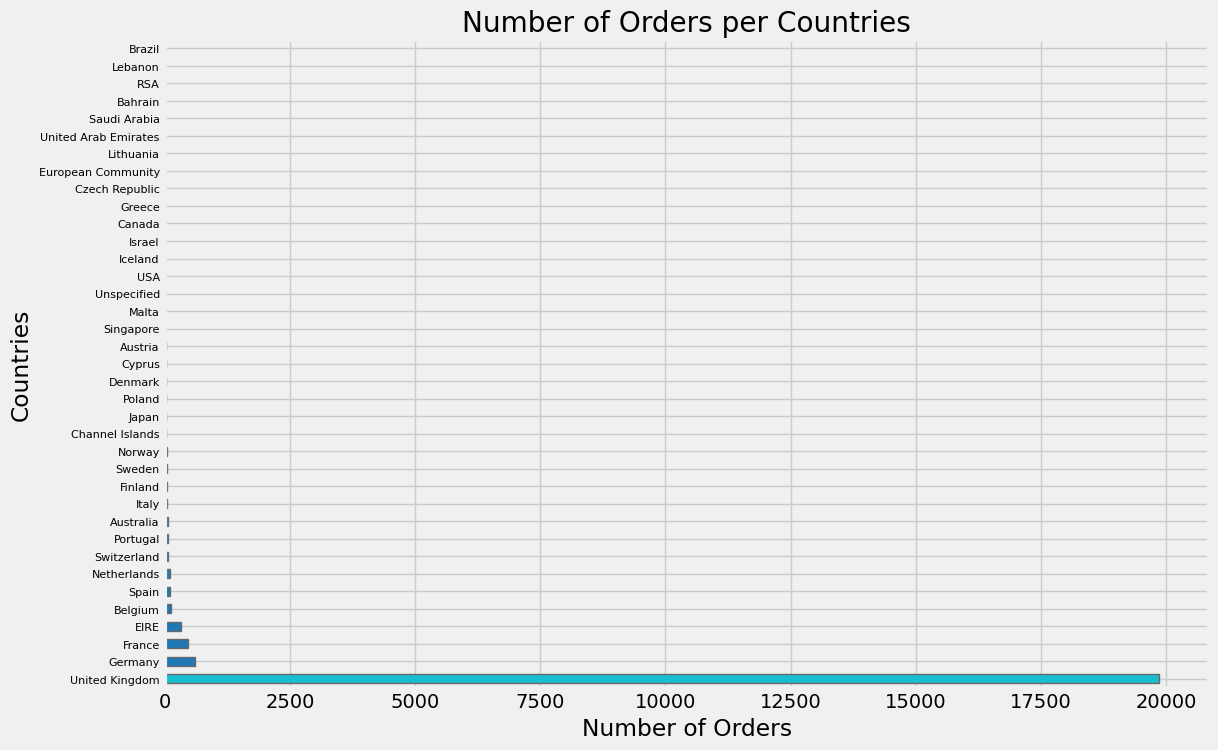

In [10]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp=temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
plt.figure(figsize=(12, 8))
ax = countries.plot(kind='barh', color=plt.cm.get_cmap('tab10')(countries/float(countries.max())))
plt.title('Number of Orders per Countries')
plt.xlabel('Number of Orders')
plt.ylabel('Countries')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

We see that the dataset is largely dominated by orders made from the UK.



<font face="Arial" size="4" color="royalblue"><b>B. INTERNAL MARKET</b></font>

---

Since this company is UK based, so we consider the market of UK as the internal market and other countires as external market.

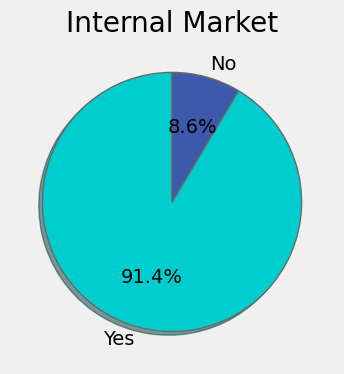

In [11]:
df['Internal'] = df.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
# Count the occurrences of 'Internal'
internal_market = df['Internal'].value_counts()

# Create a pie plot
plt.figure(figsize=(4,4))
plt.pie(internal_market, labels=internal_market.index, autopct='%1.1f%%', startangle=90, colors=['#00CDCD', '#3D59AB'],shadow=True)
plt.title('Internal Market')
plt.show()

### <font face="Arial" size="5" color="royalblue"><b>CUSTOMERS AND PRODUCTS</b></font>

---  
  


<font face="Arial" size="4" color="royalblue"><b>A. NUMBER OF USERS AND PRODUCTS</b></font>

---

In [12]:
pd.DataFrame([{'products':df['StockCode'].nunique(),
               'transactions': df['InvoiceNo'].nunique(),
               'customers': df['CustomerID'].nunique(),
              }], columns = ['products', 'transactions', 'customers'], index = ['Unique Quantity'])

products  transactions  customers
Unique Quantity      4070         25900       4372

It can be seen that the data concern 4372 users and that they bought 3684 different products. The total number of transactions carried out is of the order of  ∼ 25'900.

<font face="Arial" size="4" color="royalblue"><b>B. NUMBER OF PRODUCTS PURCHASED IN EVERY TRANSACTION</b></font>

---


In [13]:
temp1 = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp1.rename(columns = {'InvoiceDate':'Number of products'})

temp2 = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].count()
customer_product_count = temp2.rename(columns={'InvoiceDate': 'Number of products'})

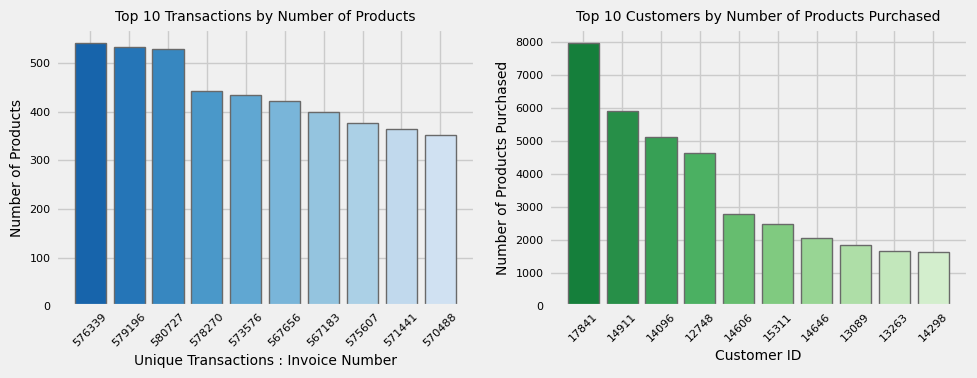

In [14]:
# Get the top 10 transactions by number of items
top_10_transactions = nb_products_per_basket.sort_values(by='Number of products', ascending=False).head(10)

# Get the top 10 customers by the maximum amount of products purchased
top_10_customers = customer_product_count.sort_values(by='Number of products', ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot top 10 transactions
bar_colors1 = plt.cm.get_cmap('Blues')(np.linspace(0.8, 0.2, len(top_10_transactions)))
axes[0].bar(top_10_transactions['InvoiceNo'], top_10_transactions['Number of products'], color=bar_colors1)
axes[0].set_xlabel('Unique Transactions : Invoice Number',fontdict={'size': 10})
axes[0].set_ylabel('Number of Products',fontdict={'size': 10})
axes[0].set_title('Top 10 Transactions by Number of Products',fontdict={'size': 10})
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', rotation=0, labelsize=8)
# Plot top 10 customers
bar_colors2 = plt.cm.get_cmap('Greens')(np.linspace(0.8, 0.2, len(top_10_customers)))
axes[1].bar(top_10_customers['CustomerID'], top_10_customers['Number of products'], color=bar_colors2)
axes[1].set_xlabel('Customer ID',fontdict={'size': 10})
axes[1].set_ylabel('Number of Products Purchased',fontdict={'size': 10})
axes[1].set_title('Top 10 Customers by Number of Products Purchased',fontdict={'size': 10})
axes[1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1].tick_params(axis='y', rotation=0, labelsize=8)
plt.tight_layout()
plt.show()

<font face="Arial" size="4" color="royalblue"><b>C. ANALYSIS OF CANCELLED TRANSACTIONS AND NEGATIVE QUANTITIES</b></font>

---

In [15]:
# Display only the canceled transactions with invoice numbers beginning with 'C'
canceled_transactions = nb_products_per_basket[nb_products_per_basket['InvoiceNo'].str.startswith('C')]
canceled_transactions.head(10)

CustomerID InvoiceNo  Number of products
1       12346   C541433                   1
23      12352   C545329                   2
24      12352   C545330                   1
25      12352   C547388                   7
39      12359   C549955                   2
40      12359   C580165                   4
55      12362   C544902                   2
56      12362   C563752                   3
57      12362   C579178                   3
66      12365   C544577                   1

In [16]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 3654/22190 (16.47%) 


We note that the number of cancellations is quite large ( ∼16% of the total number of transactions).

Now we encounter several ocations where the quantity is in negative.

In [17]:
df.sort_values('CustomerID')[:5]

InvoiceNo StockCode                       Description  Quantity  \
61619     541431     23166    MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624    C541433     23166    MEDIUM CERAMIC TOP STORAGE JAR    -74215   
286628    562032     21578  WOODLAND DESIGN  COTTON TOTE BAG         6   
72263     542237    47559B               TEA TIME OVEN GLOVE        10   
72264     542237     21154         RED RETROSPOT OVEN GLOVE         10   

            InvoiceDate  UnitPrice CustomerID         Country Internal  
61619   1/18/2011 10:01       1.04      12346  United Kingdom      Yes  
61624   1/18/2011 10:17       1.04      12346  United Kingdom      Yes  
286628    8/2/2011 8:48       2.25      12347         Iceland       No  
72263   1/26/2011 14:30       1.25      12347         Iceland       No  
72264   1/26/2011 14:30       1.25      12347         Iceland       No

On these few lines, we see that when an order is canceled, we have another transactions in the dataframe, mostly identical except for the Quantity and InvoiceDate variables. I decide to check if this is true for all the entries. To do this, I decide to locate the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice).

**Hypothesis:** For transactions with a negative quantity of items, there should be corresponding transactions with a positive quantity for the same customer, same item description, and the same magnitude of quantity but with a positive value. In other words, if a customer is involved in a transaction with a negative quantity, there should be a corresponding transaction indicating that the same customer purchased the same item, but with a positive quantity.

In [18]:
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1])
                & (df['Description'] == col[2])].shape[0] == 0:
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


CustomerID: 14527

Quantity: -1 (Negative quantity, which could represent a return or cancellation)

StockCode: D (This StockCode indicate a discount)

Description: Discount (The description of the item, which confirms that it's a discount)

UnitPrice: 27.5 (The unit price of the discount, indicating the amount of the reduction)

From this data, it appears that the transaction involves a negative quantity with the description "Discount," which implies that the customer received a discount of 27.5 units of currency on the corresponding order. The presence of "Discount" in the description, combined with the negative quantity, suggests that this entry represents a discount applied to a purchase.

 We now filter out rows with the description "Discount" before checking whether the hypothesis about negative quantities of items is fulfilled. It identifies cases where there are negative quantity transactions without corresponding positive quantity transactions for the same customer and item description (excluding "Discount" items).

In [19]:
df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1])
                & (df['Description'] == col[2])].shape[0] == 0:
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Once more, we find that the initial hypothesis is not verified. Hence, cancellations do not necessarily correspond to orders that would have been made beforehand.

At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before December 2010 (the point of entry of the database). Below, I make a census of the cancel orders and check for the existence of counterparts:

In [20]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) &
                         (df['InvoiceDate'] < col['InvoiceDate']) &
                         (df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0):
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index)
            break

In the above function, I checked the two cases:

1. a cancel order exists without counterpart.

2. there's at least one counterpart with the exact same quantity.

If no counterparts are found, the index of the current row is added to `doubtful_entry`. If one counterpart is found, the corresponding index is stored in index_order, and the '`QuantityCanceled`' value for that counterpart is updated. If multiple counterparts are found, the code sorts them in descending order and iterates through them. The first counterpart with a positive quantity greater than or equal to the negative quantity of the current row will have the '`QuantityCanceled`' value updated, and the index of the current row is added to `entry_to_remove`.

In [21]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6168
doubtfull_entry: 4335


Among these entries, those listed in the doubtfull_entry list correspond to cancellation records that lack a preceding order. In practice, I've chosen to remove all of these entries, which make up approximately 1.4% and 0.2% of the total DataFrame entries.

Now, I am examining the count of cancellation entries that remain after the previous filtering step, where I have not deleted them.

In [22]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("Number of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

Number of entries to delete: 44


InvoiceNo StockCode                      Description  Quantity  \
27329   C538530     22630             DOLLY GIRL LUNCH BOX       -33   
32870   C539195     22942      CHRISTMAS LIGHTS 10 SANTAS         -5   
33085   C539221     22941     CHRISTMAS LIGHTS 10 REINDEER       -12   
33086   C539221     22942      CHRISTMAS LIGHTS 10 SANTAS        -10   
58496   C541245    85036C  ROSE 1 WICK MORRIS BOXED CANDLE       -12   

            InvoiceDate  UnitPrice CustomerID         Country Internal  \
27329  12/13/2010 10:26       1.95      14796  United Kingdom      Yes   
32870  12/16/2010 12:05       8.50      12748  United Kingdom      Yes   
33085  12/16/2010 12:56       8.50      14911            EIRE       No   
33086  12/16/2010 12:56       8.50      14911            EIRE       No   
58496   1/16/2011 12:40       4.25      15535  United Kingdom      Yes   

       QuantityCanceled  
27329                 0  
32870                 0  
33085                 0  
33086                 0  
58496                 0

### <font face="Arial" size="5" color="royalblue"><b>STOCK CODES</b></font>

---  

In [23]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes_df = pd.DataFrame(list_special_codes, columns=["SPECIAL CODES"])
special_codes_df

SPECIAL CODES
0           POST
1              D
2             C2
3            DOT
4              M
5   BANK CHARGES
6      AMAZONFEE
7       DCGS0076
8       DCGS0003
9   gift_0001_40
10      DCGS0070
11             m
12  gift_0001_50
13  gift_0001_30
14  gift_0001_20
15      DCGS0069
16      DCGSSBOY
17     DCGSSGIRL
18  gift_0001_10
19             S
20          PADS
21      DCGS0004
22             B

In [24]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
DOT             -> DOTCOM POSTAGE                
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
AMAZONFEE       -> AMAZON FEE                    
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT  
DCGS0003        -> BOXED GLASS ASHTRAY           
gift_0001_40    -> Dotcomgiftshop Gift Voucher £40.00
DCGS0070        -> CAMOUFLAGE DOG COLLAR         
m               -> Manual                        
gift_0001_50    -> Dotcomgiftshop Gift Voucher £50.00
gift_0001_30    -> Dotcomgiftshop Gift Voucher £30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher £20.00
DCGS0069        -> OOH LA LA DOGS COLLAR         
DCGSSBOY        -> BOYS PARTY BAG                
DCGSSGIRL       -> GIRLS PARTY BAG               
gift_0001_10    -> Dotcomgiftshop Gift Voucher £10.00
S               -> SAMPLES    

### <font face="Arial" size="5" color="royalblue"><b>BASKET PRICE</b></font>

---  

I am generating a new variable that denotes the total price for each purchase:

In [25]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

InvoiceNo StockCode                      Description  Quantity  \
61619     541431     23166   MEDIUM CERAMIC TOP STORAGE JAR     74215   
286637    562032     22423         REGENCY CAKESTAND 3 TIER         3   
72274     542237    84558A     3D DOG PICTURE PLAYING CARDS        12   
72273     542237     21731    RED TOADSTOOL LED NIGHT LIGHT        12   
72272     542237     22497  SET OF 2 TINS VINTAGE BATHROOM          4   

            InvoiceDate  UnitPrice CustomerID         Country Internal  \
61619   1/18/2011 10:01       1.04      12346  United Kingdom      Yes   
286637    8/2/2011 8:48      12.75      12347         Iceland       No   
72274   1/26/2011 14:30       2.95      12347         Iceland       No   
72273   1/26/2011 14:30       1.65      12347         Iceland       No   
72272   1/26/2011 14:30       4.25      12347         Iceland       No   

        QuantityCanceled  TotalPrice  
61619              74215        0.00  
286637                 0       38.25  
72274                  0       35.40  
72273                  0       19.80  
72272                  0       17.00

In the provided table, each DataFrame entry represents prices for a specific type of product. Consequently, orders are divided into multiple rows. My objective is to aggregate all purchases associated with a single order in order to retrieve the total order price:

In [26]:
# Grouping and aggregating purchase data
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})
# Converting 'InvoiceDate' to datetime data type
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
# Grouping and working with datetime data
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].mean()
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])
# Filtering out entries with non-positive basket price
basket_price = basket_price[basket_price['Basket Price'] > 0]
# Sorting the DataFrame
basket_price.sort_values('CustomerID')[:6]

CustomerID InvoiceNo  Basket Price                   InvoiceDate
1      12347    537626        711.79 2010-12-07 14:57:00.000000000
2      12347    542237        475.39 2011-01-26 14:29:59.999999744
3      12347    549222        636.25 2011-04-07 10:43:00.000000000
4      12347    556201        382.52 2011-06-09 13:01:00.000000000
5      12347    562032        584.91 2011-08-02 08:48:00.000000000
6      12347    573511       1294.32 2011-10-31 12:25:00.000000000

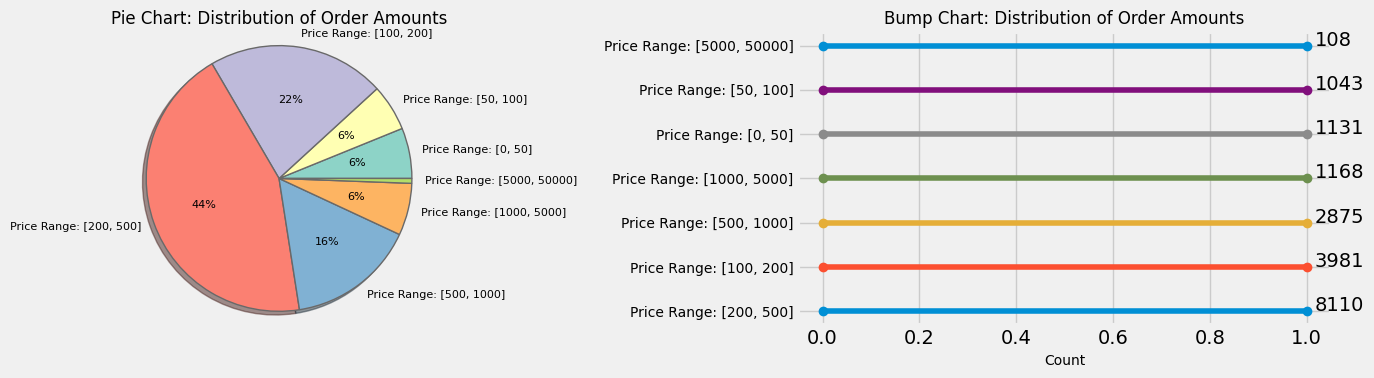

In [27]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0:
        continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
labels = ['Price Range: [{}, {}]'.format(price_range[i-1], s) for i, s in enumerate(price_range) if i != 0]
bump_data = pd.DataFrame({'Price Range': labels, 'Count': count_price})
bump_data.sort_values(by='Count', ascending=False, inplace=True)
bump_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sizes = count_price
colors = plt.cm.Set3.colors
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '',
       shadow=True, startangle=0, textprops={'fontsize': 8})  # Adjust fontsize here
plt.axis('equal')
plt.title("Pie Chart: Distribution of Order Amounts",  fontdict={'size': 12})
plt.subplot(1, 2, 2)
for i, row in bump_data.iterrows():
    plt.plot([0, 1], [i, i], marker='o', label=row['Price Range'])
    plt.annotate(f'{row["Count"]}', xy=(1, i), xytext=(6, 0), textcoords='offset points')

plt.yticks(bump_data.index, bump_data['Price Range'], fontdict={'size': 10})
plt.xlabel('Count', fontdict={'size': 10})
plt.title('Bump Chart: Distribution of Order Amounts', fontdict={'size': 12})
plt.tight_layout()
plt.show()

It's apparent that a substantial majority of orders revolve around comparatively sizable purchases, as roughly 65% of transactions result in amounts surpassing £200. Furthermore, approximately 44% of order values lie within the £200 to £500 range. This bump plot visually displays rank changes across price categories. Vertical lines depict the trajectory of each category, highlighting shifts in rank positions. It's effective for revealing trends and comparing relative changes, making it useful for showcasing shifts in market dynamics and the historical evolution of price distribution.

# <font face="Arial" size="5" color="royalblue"><b>INSIGHTS ON PRODUCT CATAGORIES</b></font>

---


In the dataset, each product is distinguished by a unique StockCode value. The Description variable contains a brief overview of the products. In this segment, my aim is to utilize the information in the Description variable to categorize the products into various groups.

### <font face="Arial" size="5" color="royalblue"><b>PRODUCT DESCRIPTION</b></font>

---

As an initial step, I am extracting pertinent information from the 'Description' variable utilizing the following function.

In [28]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1

    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Number of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords


This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:

* extract the names (proper, common) appearing in the products description

* for each name, I extract the root of the word and aggregate the set of names associated with this particular root

* count the number of times each root appears in the dataframe

* when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)

The first step of the analysis is to retrieve the list of products:

In [29]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

Once this list is created, I use the function I previously defined in order to analyze the description of the various products:



In [30]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Number of keywords in variable 'Description': 1603


The execution of this function returns three variables:

* `keywords:` the list of extracted keywords

* `keywords_roots:` a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots

* `count_keywords:` dictionary listing the number of times every word is used

At this point, I convert the `count_keywords` dictionary into a list, to sort the keywords according to their occurences:

In [31]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

Using it, I create a representation of the most common keywords:

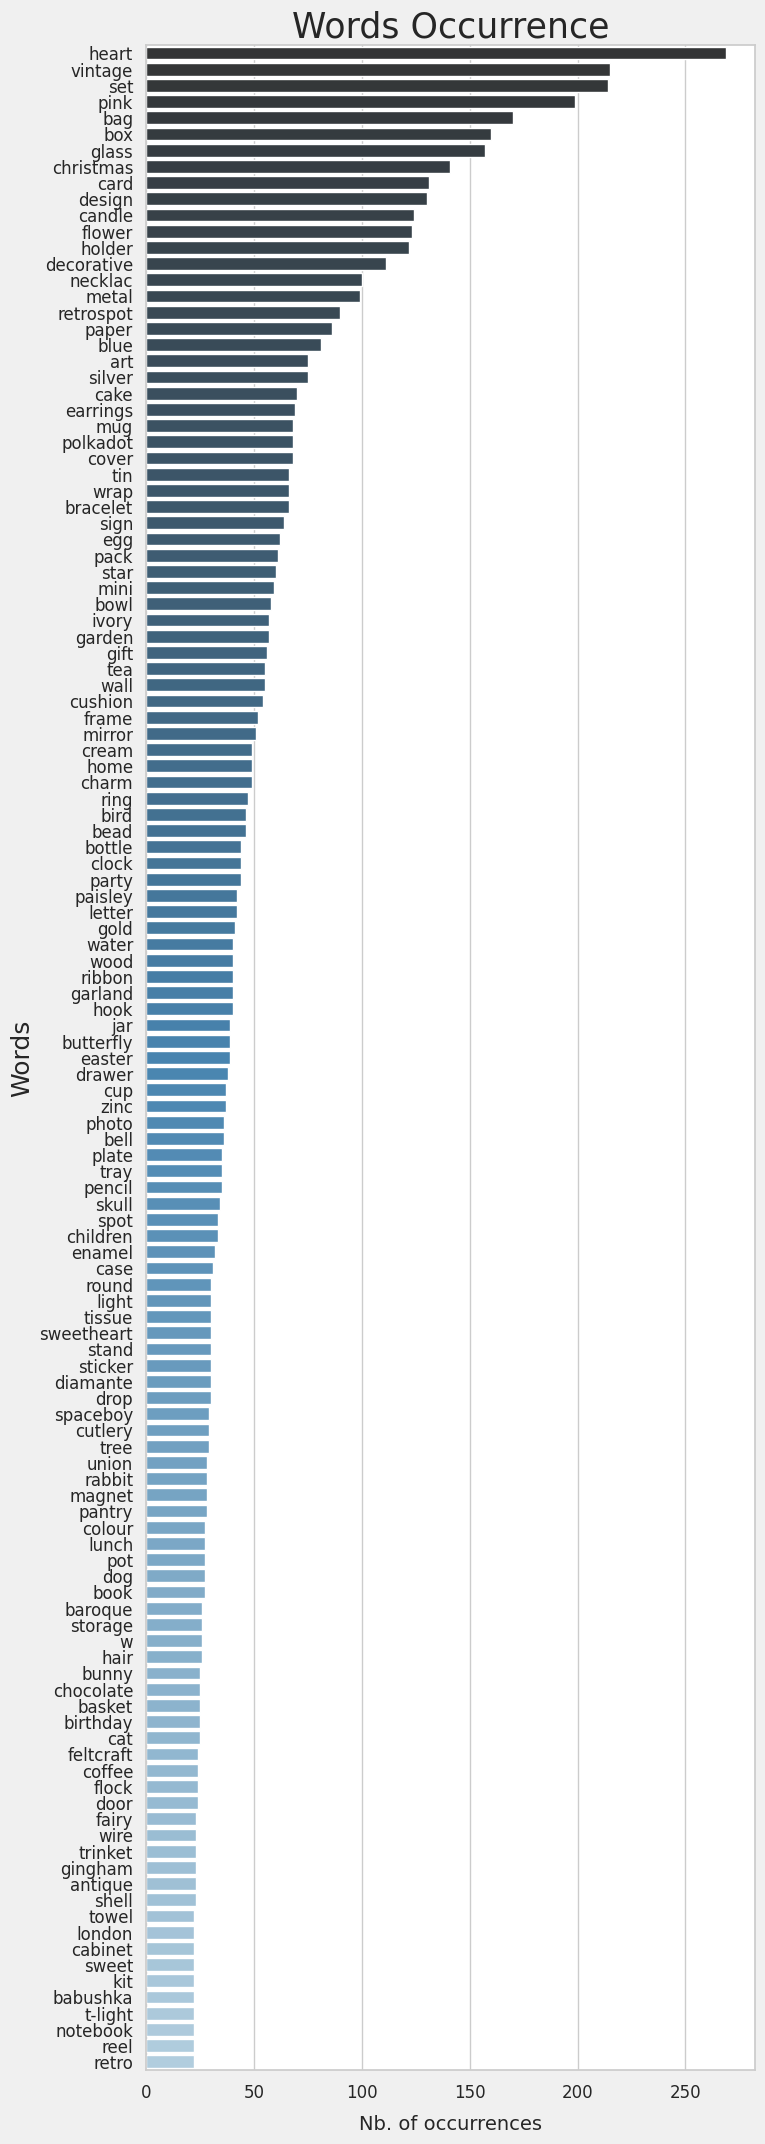

In [32]:
# Assuming 'liste' contains the data
liste = sorted(list_products, key=lambda x: x[1], reverse=True)
y_axis = [i[1] for i in liste[:125]]
x_label = [i[0] for i in liste[:125]]

plt.rc('font', weight='normal')
plt.figure(figsize=(7, 25))

sns.set(style="whitegrid")

# Reversed color palette
color_palette = sns.color_palette("Blues_d", len(x_label))[::-1]

ax = sns.barplot(x=y_axis, y=x_label, palette=color_palette)

plt.xlabel("Nb. of occurrences", fontsize=14, labelpad=10)
plt.ylabel("Words", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Words Occurrence", fontsize=25)

plt.show()

### <font face="Arial" size="5" color="royalblue"><b>PRODUCT CATAGORIES</b></font>

---

The list that was obtained contains more than 1603 keywords and the most frequent ones appear in more than 200 products. However, while examinating the content of the list, I note that some names are useless. Others are do not carry information, like colors. Therefore, I discard these words from the analysis that follows and also, I decide to consider only the words that appear more than 13 times.

In [33]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________
list_products.sort(key = lambda x:x[1], reverse = True)
print('retained words:', len(list_products))

retained words: 197


<font face="Arial" size="4" color="royalblue"><b>A. DATA ENCODING</b></font>

---

To effectively categorize and group our products, I've devised a method involving the creation of a matrix that associates products with keywords. This matrix, which I'll refer to as X, will serve as a valuable tool in organizing our products based on their descriptions.

Let's break down how the matrix X is constructed:

* Rows: Each row in matrix X corresponds to a unique product that we offer. In total, we have M different products.

* Columns: On the other hand, each column represents a specific keyword or word. These words have been carefully selected from our product descriptions, and in total, we have N different words.

* Matrix Element: Now, the crux of the matter lies in the elements of this matrix. The entry in row i and column j, denoted as ai,j, is essentially a binary value. It tells us whether the product i's description contains the word j. If it does, then ai,j is set to 1; otherwise, it's set to 0.

By creating this matrix, we're able to capture the essence of our products' descriptions in a structured and computationally friendly format. The matrix X is essentially a representation of the relationships between our products and the words that define them.

In [34]:
liste_produits = df_cleaned['Description'].dropna().unique()
X = pd.DataFrame()

for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x: int(key.upper() in x), liste_produits))

The matrix X employs one-hot encoding to represent the words found within product descriptions. To achieve more balanced groupings in terms of element counts, I've discovered that introducing the price range as a factor is beneficial. Consequently, I'm expanding this matrix by incorporating six additional columns. These new columns will signify the price range associated with each product.

In [35]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

and to choose the appropriate ranges, I check the number of products in the different groups:

In [36]:
print("{:<8} {:<20} \n".format('range', 'number of produts') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of produts    
--------------------
0<.<1       728                 
1<.<2       995                 
2<.<3       736                 
3<.<5       740                 
5<.<10      592                 
.>10        287                 


<font face="Arial" size="4" color="royalblue"><b>B. CLUSTER OF PRODUCTS</b></font>

---

In this section, my objective is to categorize the products into distinct classes. When dealing with matrices that utilize binary encoding, the most appropriate measurement for calculating the differences between them is Hamming's metric. It's important to note that the kmeans method provided by sklearn employs Euclidean distance, which can be used for this purpose, but it might not be the optimal choice when dealing with categorical variables. Unfortunately, I cannot utilize the Hamming's metric directly due to the unavailability of the kmodes package on the current platform. As a result, I resort to using the kmeans method, even though it might not be the most suitable option in this context.

To roughly determine the optimal number of clusters that accurately represent the data, I make use of the silhouette score:

The silhouette score is a metric used to evaluate the quality of clusters formed by a clustering algorithm, such as k-means. It provides a way to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where:

* A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

* A score of 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.

* A low silhouette score indicates that the object is closer to a neighboring cluster than its own.

In [37]:
matrix = X.values  # Convert DataFrame to a NumPy array
silhouette_scores = []
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    silhouette_scores.append(silhouette_avg)
result_df = pd.DataFrame({'Number of Clusters': range(3, 10), 'Silhouette Score': silhouette_scores})
result_df

Number of Clusters  Silhouette Score
0                   3          0.088847
1                   4          0.119100
2                   5          0.139929
3                   6          0.135921
4                   7          0.143165
5                   8          0.135569
6                   9          0.131277

In practical terms, the scores I've obtained from my clustering experiments are quite similar. When evaluating silhouette scores, I've noticed that values around 0.1±0.05 are consistently obtained for all cluster sizes greater than 3, with a slight dip for the first cluster. However, beyond 5 clusters, I observed that some clusters contained very few data points. In light of this observation, I decided to proceed with segmenting the dataset into 5 clusters. This choice seemed to strike a balance between achieving a reasonable level of granularity and avoiding the creation of overly sparse clusters.

In order to ensure a robust and stable classification outcome, I adopted an iterative approach. I kept iterating until I achieved the best possible silhouette score, which in my case settled around 0.15. This iterative refinement process aimed to find the most suitable clustering solution by exploring different settings and options. This method resonates with standard practices in data analysis and clustering, as it acknowledges the potential for ambiguity in determining the ideal number of clusters.

Throughout this process, I've kept in mind that the selection of the number of clusters and the interpretation of the results should be grounded in domain knowledge and the specific goals of the analysis. While silhouette scores provide valuable insights, considering other evaluation techniques and domain expertise is crucial for making well-informed decisions about the final clustering solution.

In [47]:
n_clusters = 5
max_iterations = 4  # Set the maximum number of iterations to 4
total_silhouette_score = 0
iterations = 0

while iterations < max_iterations:
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    total_silhouette_score += silhouette_avg
    iterations += 1
    print("Iteration:", iterations, "For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

average_silhouette_score = total_silhouette_score / max_iterations

if average_silhouette_score >= 0.145:
    print("Average silhouette score for n_clusters =", n_clusters, "is:", average_silhouette_score)
else:
    print("Average silhouette score for n_clusters =", n_clusters, "is below the threshold.")

Iteration: 1 For n_clusters = 5 The average silhouette_score is: 0.11907878015691471
Iteration: 2 For n_clusters = 5 The average silhouette_score is: 0.1411566838788045
Iteration: 3 For n_clusters = 5 The average silhouette_score is: 0.13992896243661526
Iteration: 4 For n_clusters = 5 The average silhouette_score is: 0.13677634031184727
Average silhouette score for n_clusters = 5 is below the threshold.


<font face="Arial" size="4" color="royalblue"><b>B. CHARACTERIZING THE CONTENT OF THE CLUSTER</b></font>

---

I check the number of elements in every class:

In [39]:
pd.Series(clusters).value_counts()

1    995
2    879
3    740
0    736
4    728
dtype: int64

> <font face="Arial"  color="darkred"><b> I. SILHOUETTE INTRA-CLUSTER SCORE</b></font>

---

Intra-class silhouette score measures how well data points within a single cluster are grouped together. It calculates the average silhouette score for each cluster, indicating the coherence and separation of points within clusters. Higher values suggest well-defined, internally consistent clusters.

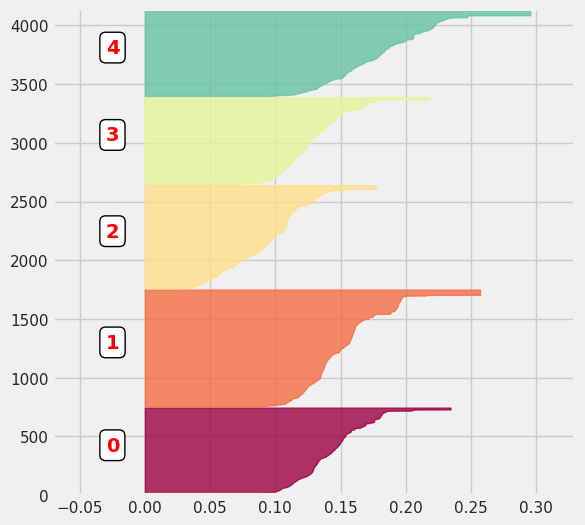

In [40]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(6, 6)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

The silhouette score ranges between 0.2 to 0.25 indicating the clusters are not well separated.

> <font face="Arial"  color="darkred"><b> II. WORDCLOUD</b></font>

---

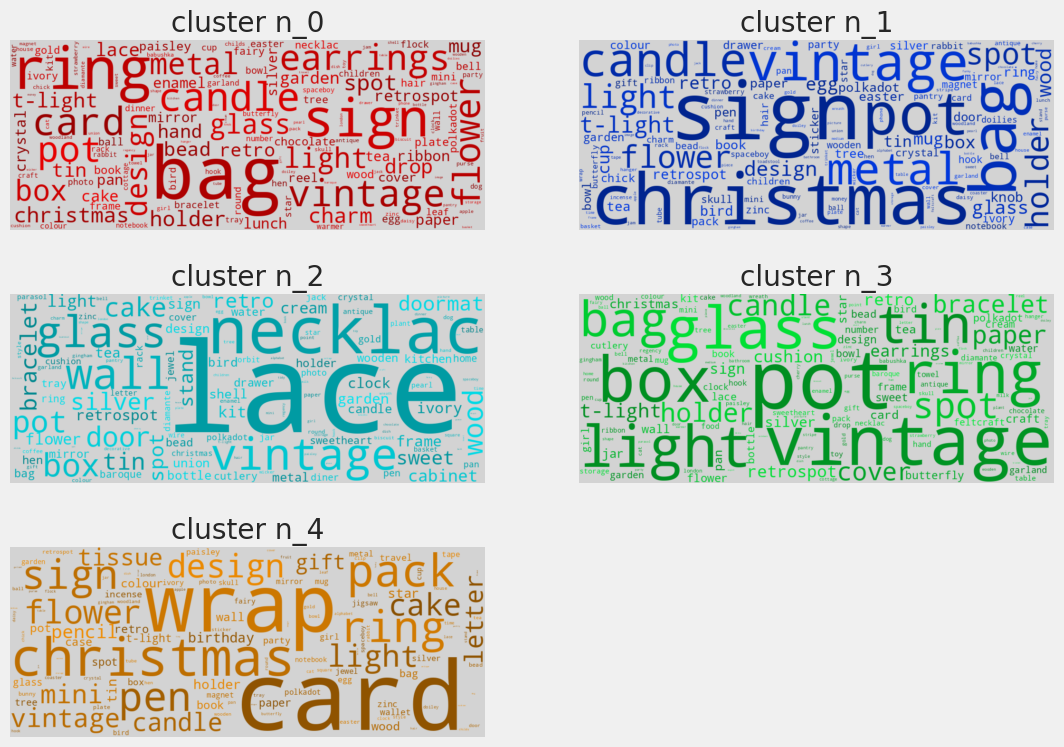

In [41]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))
#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey',
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n_{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(12,12))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

I successfully generated word cloud visuals to explore my product clusters. Each cloud showcases frequent words within cluster products, with varied colors denoting different terms. This visual approach aids in understanding the significant characteristics of each product group's content. From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts (keywords: Christmas, packaging, card, ...). Another cluster would rather contain luxury items and jewelry (keywords: necklace, bracelet, lace, silver, ...). Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.

> <font face="Arial"  color="darkred"><b> III. PRINCIPAL COMPONENT ANALYSIS</b></font>

---

To ensure genuine differentiation among these clusters, I examine their makeup. Considering the extensive array of variables within the initial matrix, I begin by conducting a Principal Component Analysis (PCA).

In [42]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

and then check for the amount of variance explained by each component:

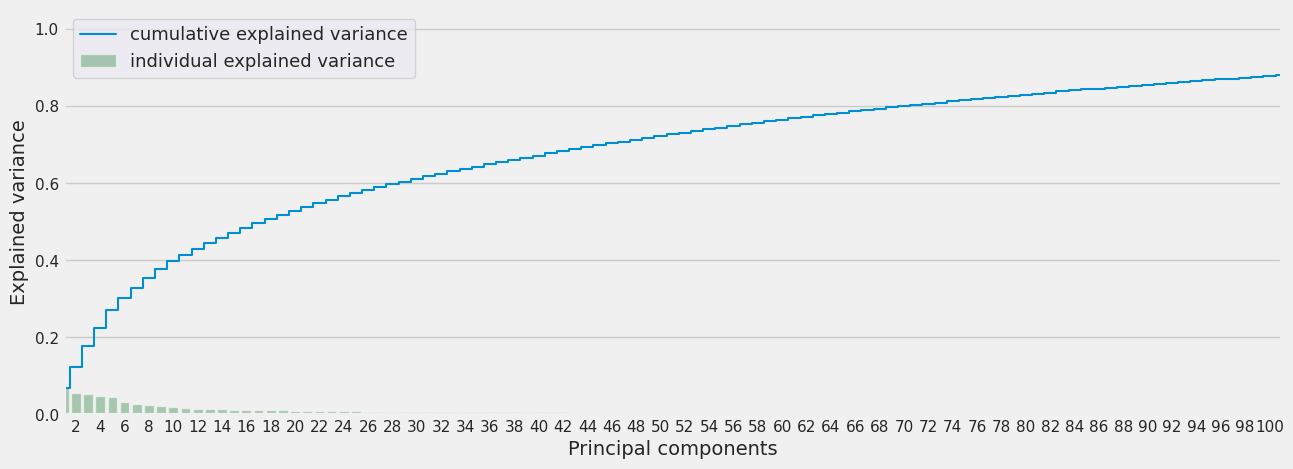

In [45]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')

sns.barplot(x=np.arange(1, matrix.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.5, color='g',
            label='individual explained variance');  # Add a semicolon here

plt.xlim(0, 100)
ax.set_xticklabels([s if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])
plt.ylabel('Explained variance', fontsize=14)
plt.xlabel('Principal components', fontsize=14)
plt.legend(loc='upper left', fontsize=13)
plt.show()

We see that the number of components required to explain the data is extremely important: we need more than 100 components to explain 90% of the variance of the data. In practice, I decide to keep only a limited number of components since this decomposition is only performed to visualize the data:

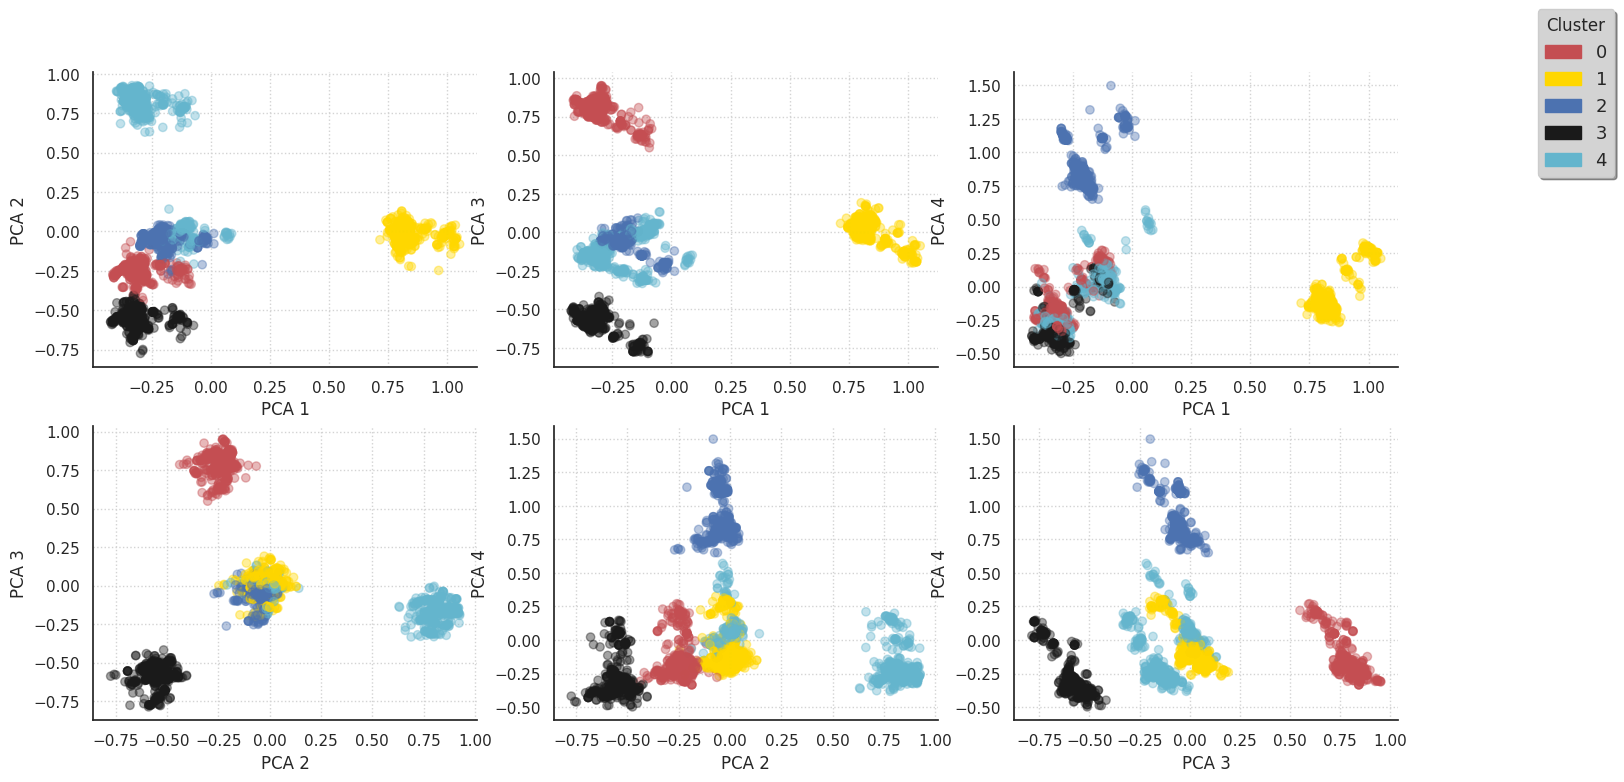

In [49]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4)
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        if increment == 9: break
    if increment == 9: break

#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97),
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

# <font face="Arial" size="10" color="GREEN"><b> $\star$ CUSTOMER SEGMENTATION</b></font>

---

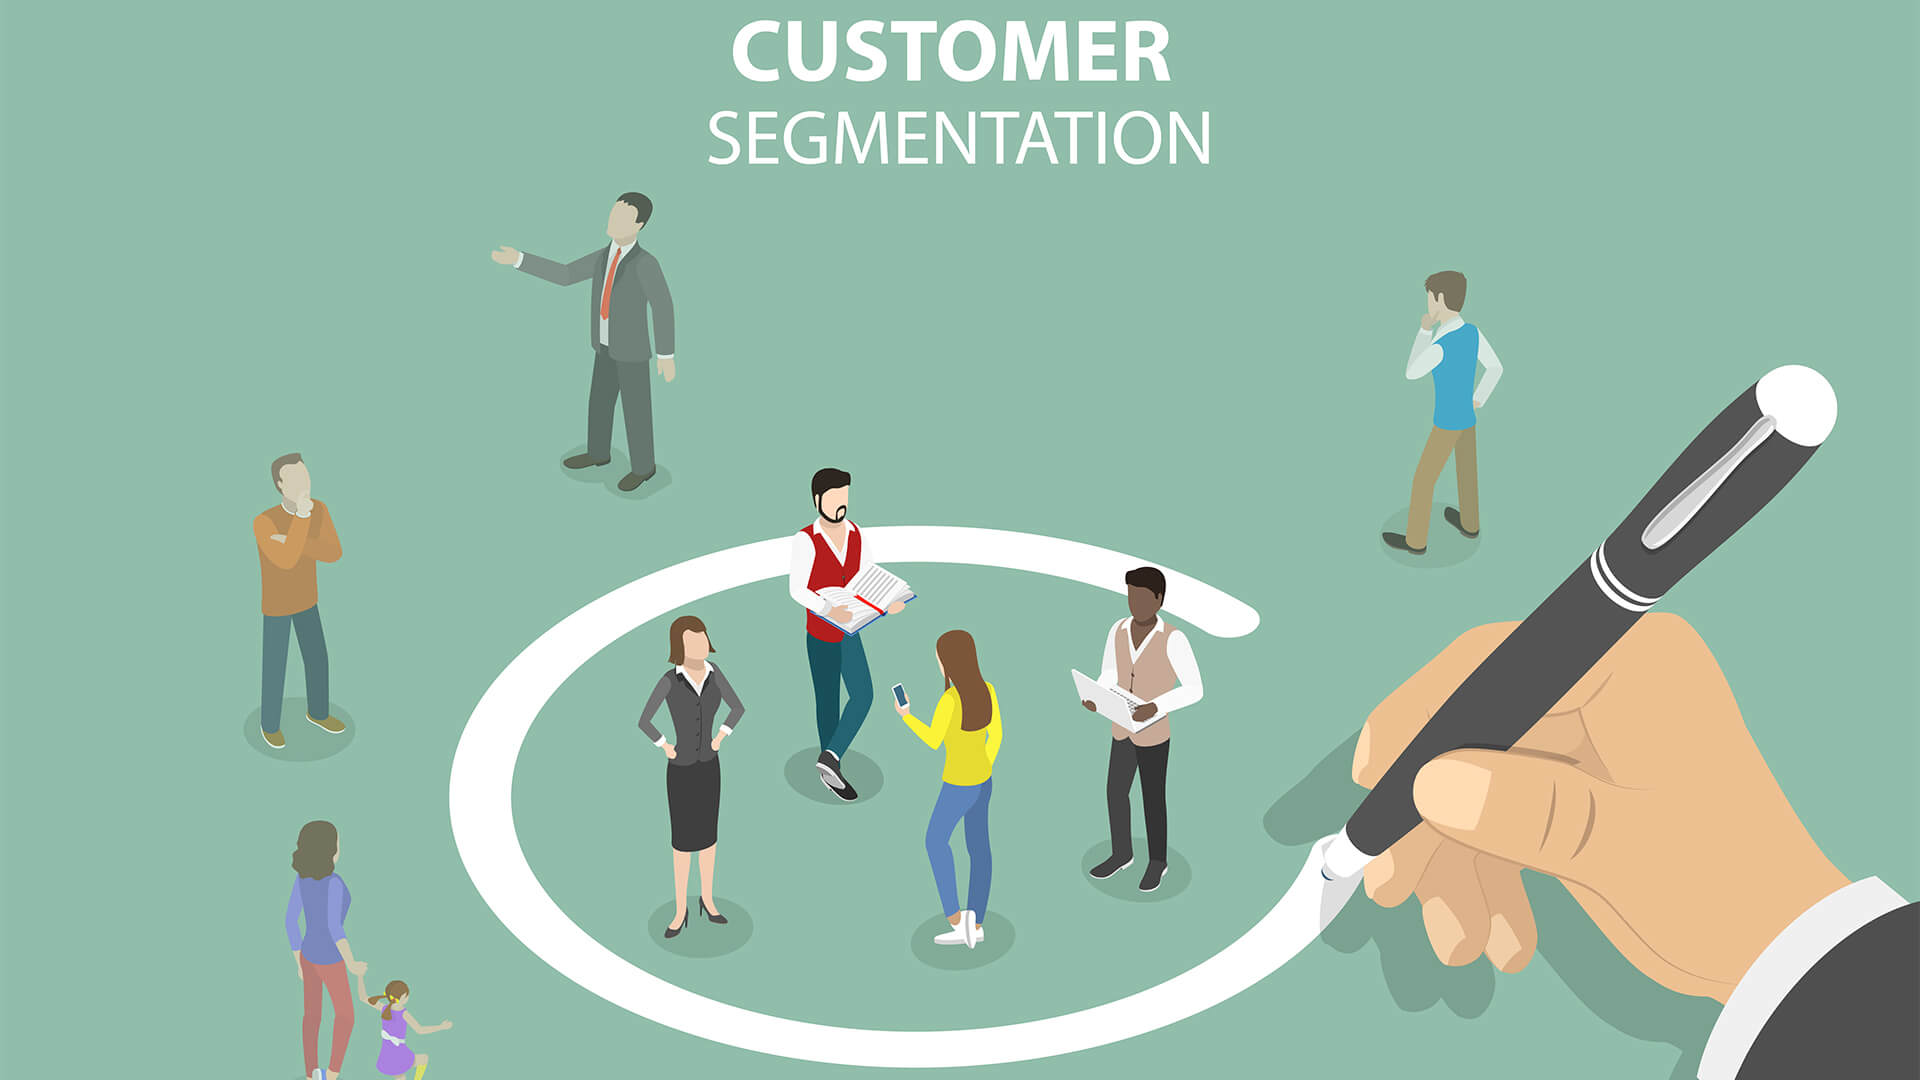

Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

* **Higher Revenue:** This is the most obvious requirement of any customer segmentation project.

* **Customer Understanding:** One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.

* **Target Marketing:** The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.

* **Optimal Product Placement:** A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.

* **Finding Latent Customer Segments:** Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.

# <font face="Arial" size="5" color="royalblue"><b> RFM ANALYSIS</b></font>

---



**RFM Model for Customer Value:**
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a **RFM(Recency, Frequency and Monetary Value)**, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

* **Recency:** The value of how recently a customer purchased at the establishment.

* **Frequency:** How frequent the customer’s transactions are at the establishment.

* **Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment.




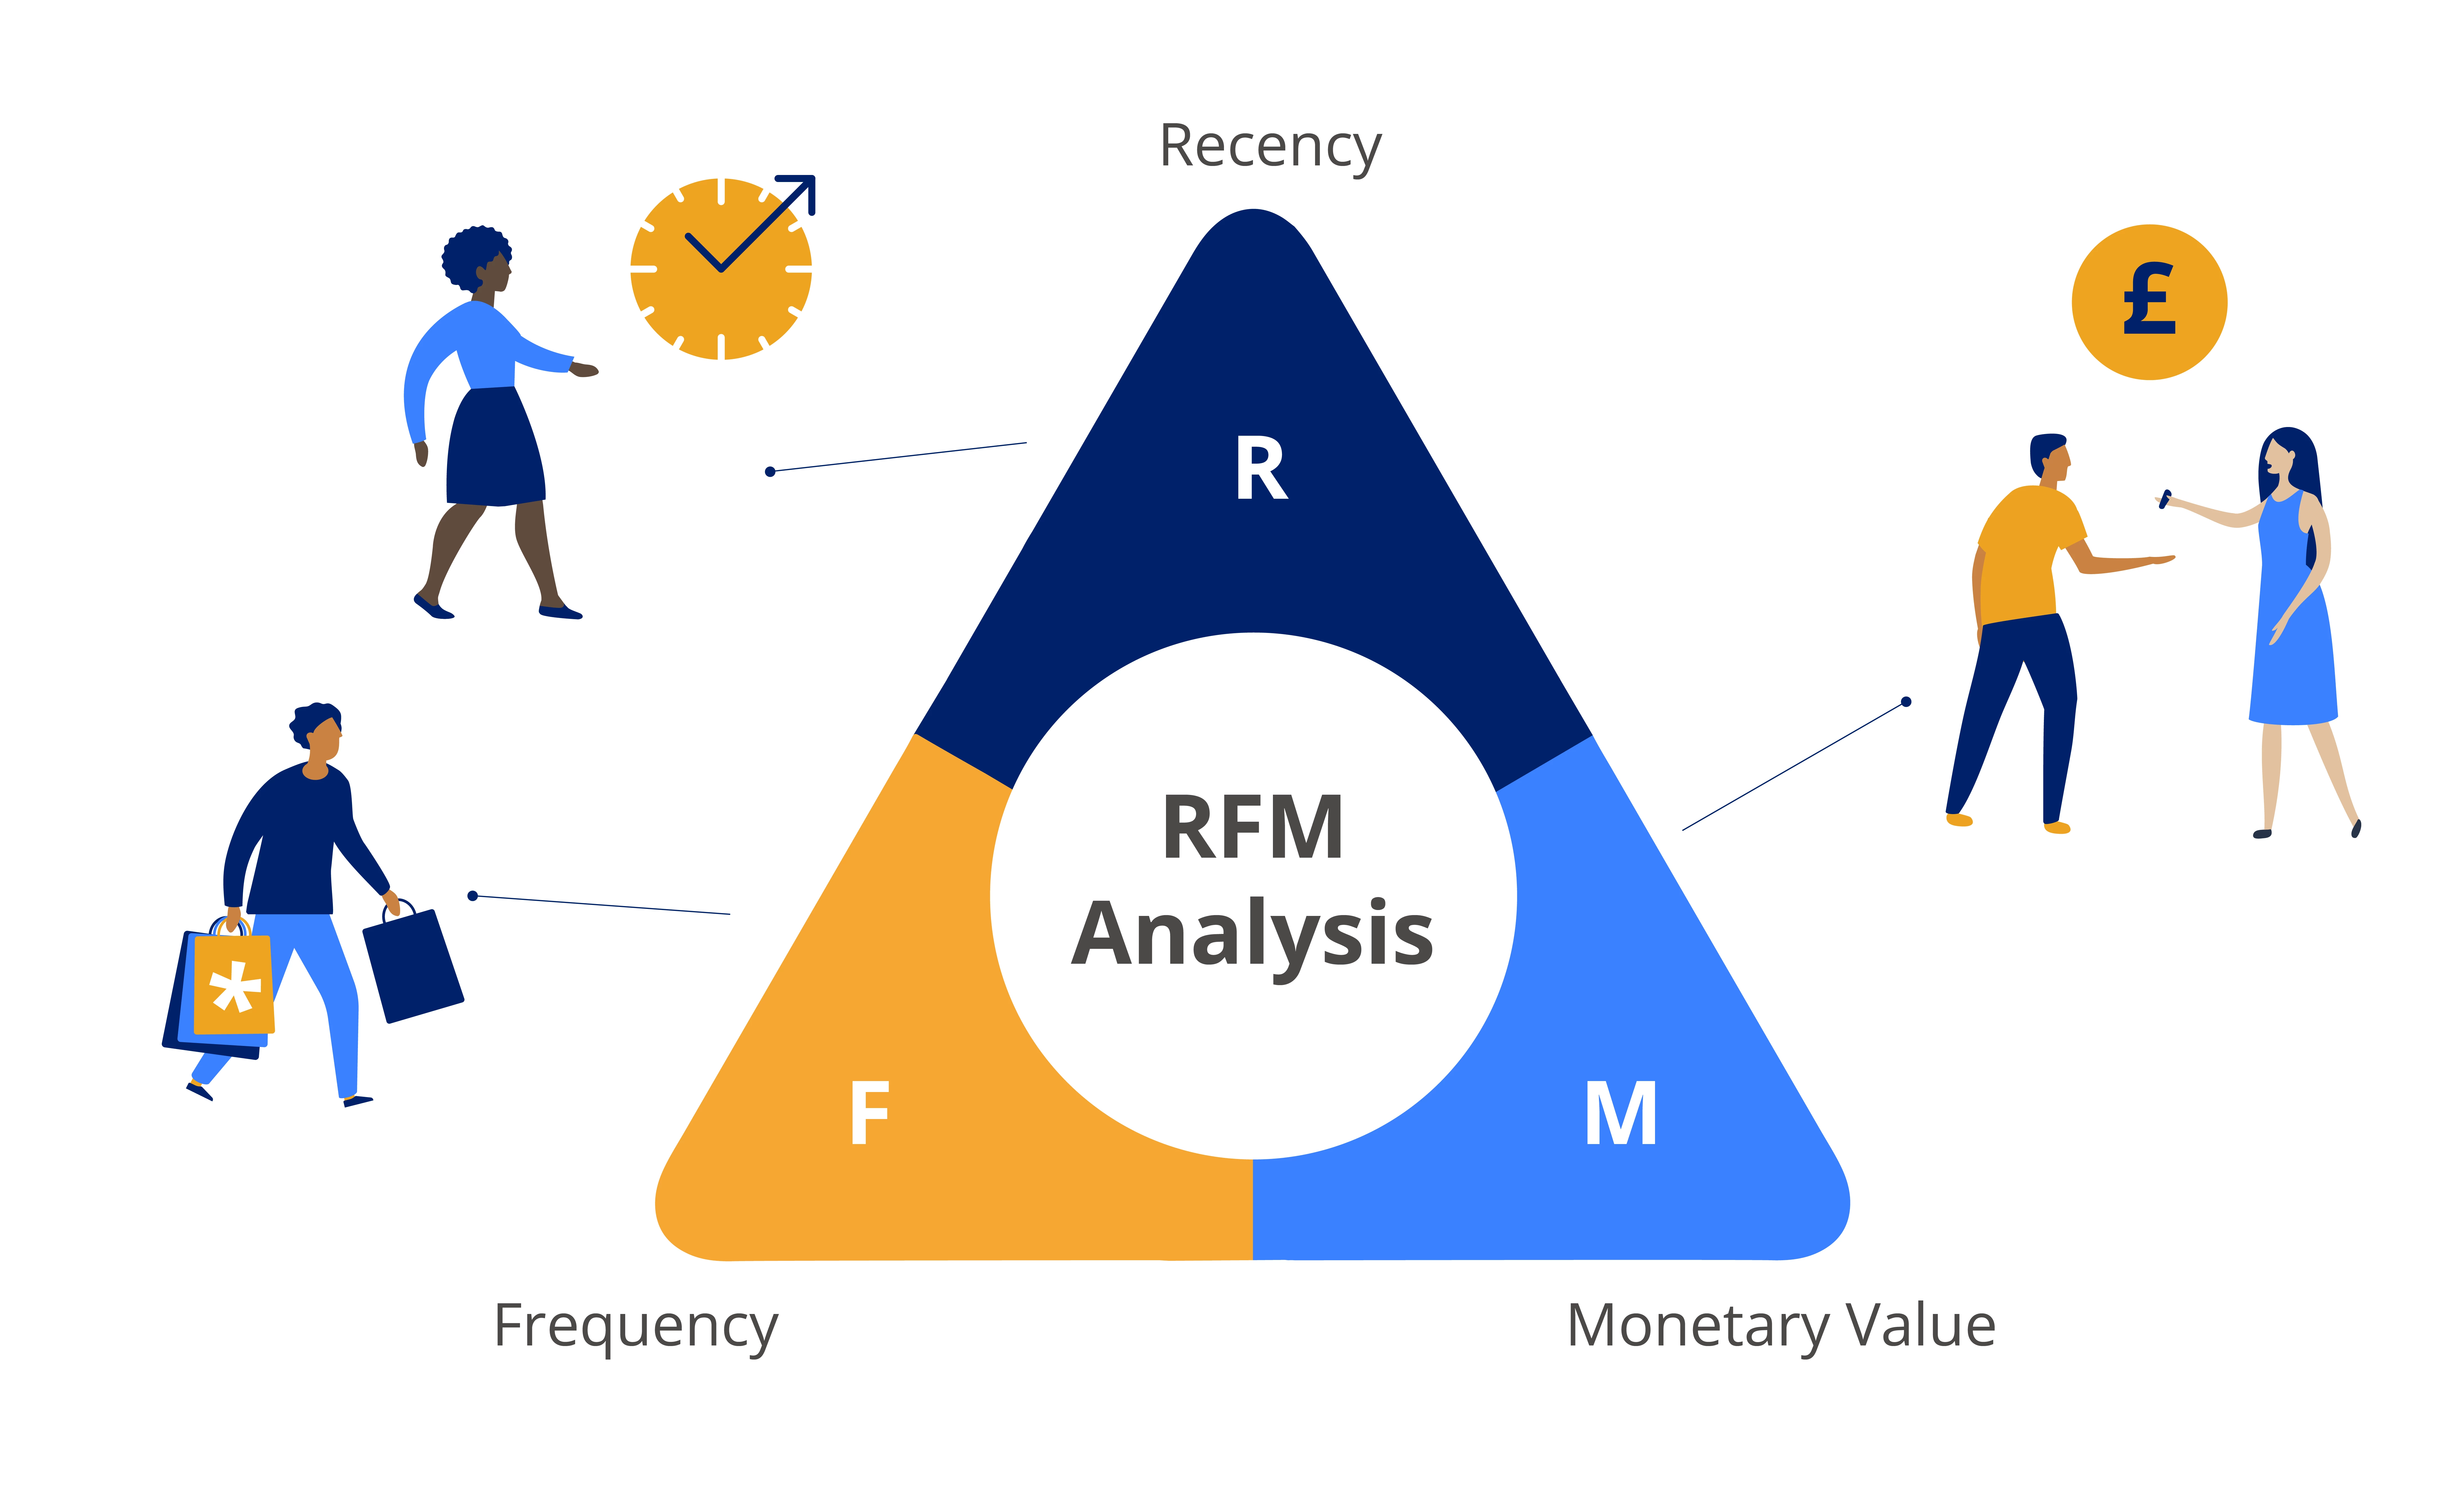

### <font face="Arial" size="5" color="royalblue"><b>RECENCY</b></font>

---

To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [62]:
refrence_date = df.InvoiceDate.max() + dt.timedelta(days = 1)
print('Reference Date:', refrence_date)
df['days_since_last_purchase'] = (refrence_date - df.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df.describe().transpose()

Reference Date: 2011-12-10 12:50:00


count       mean         std  min   25%   50%    75%    max
recency  4372.0  92.047118  100.765435  1.0  17.0  50.0  143.0  374.0

We will plot the Recency Distribution and QQ-plot to identify substantive departures from normality, likes outliers, skewness and kurtosis.

**Recency Distribution Plot:**
The Recency Distribution plot (usually in the form of a histogram or a density plot) helps us to understand how recency values are distributed across your customer base.

**QQ-Plot for Normality Assessment:**
A QQ-plot is a graphical tool used to assess whether a dataset follows a normal distribution (bell curve). In a QQ-plot, the quantiles of the data are compared to the quantiles of a theoretical normal distribution. If the points on the QQ-plot closely follow a straight line, it indicates that the data is approximately normally distributed. If the points deviate from the line, it suggests departures from normality, such as outliers, skewness (asymmetry), or kurtosis (peakedness).

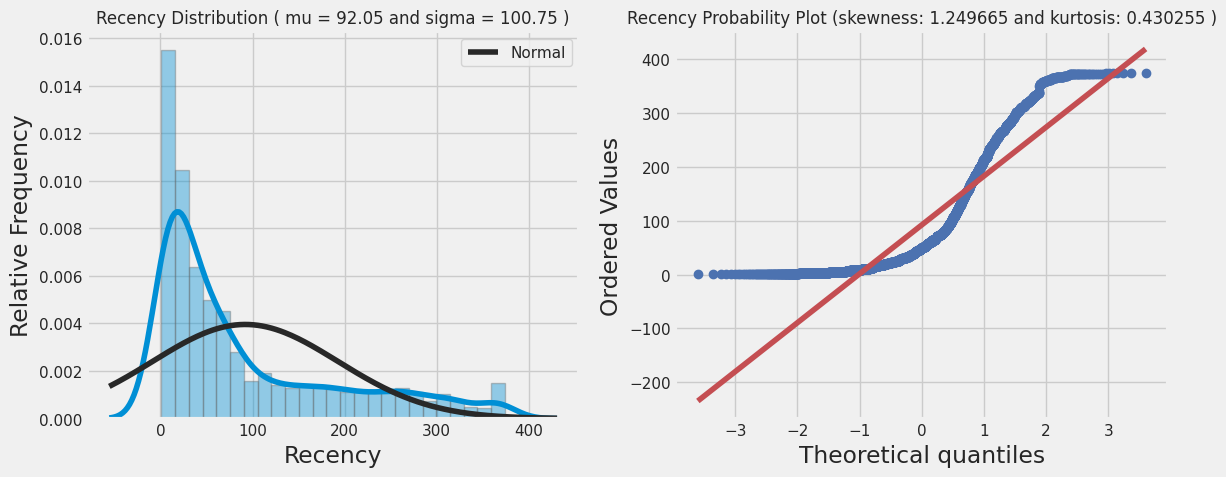

In [63]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(12, 5))

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm, fit_kws={'label': 'Normal'})
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center', fontdict={'size': 12})
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Relative Frequency')
    fig1.legend()  # Add legend

    # QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center', fontdict={'size': 12})

    plt.tight_layout()
    plt.show()

# Example usage
QQ_plot(customer_history_df.recency, 'Recency')

* The sales recency distribution is skewed, with a peak on the left and a longer tail on the right, indicating positive bias.

* The probability plot confirms the right-skewed nature of the distribution.

* A positive skewness value of 1.25 confirms the right-skewed shape, indicating more data points on the right side.

* The sales distribution plot also demonstrates a longer tail on the right side, characteristic of right-skewed distributions.

* A positive kurtosis value of 0.43 indicates heavy-tailed behavior and the presence of outliers.

In summary, the sales recency distribution is positively skewed, with a prominent right-leaning tail and indications of heavy-tailed behavior and outliers.

### <font face="Arial" size="5" color="royalblue"><b>FREQUENCY</b></font>

---


The frequency of customer transactions at the establishment refers to how often customers make purchases. It can be measured by the average number of transactions within a given time period. Higher frequency indicates more frequent visits, while lower frequency suggests less frequent customer engagement with the establishment.

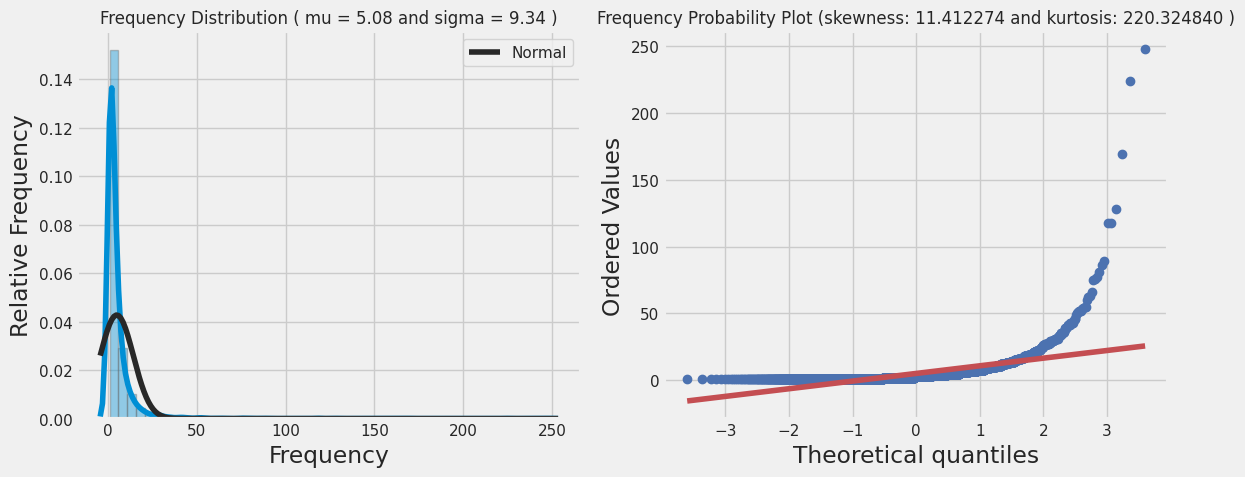

In [64]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')


* The sales frequency distribution shows left-side peaking and a longer right tail, indicating positive skewness and departure from normality.

* The probability plot confirms right-skewed shape.

* High positive skewness of 11.4 emphasizes strong asymmetry towards lower frequencies.

* Kurtosis of 220.32 indicates heavy-tailed distribution with outliers.

In summary, the sales frequency distribution is highly right-skewed, indicating infrequent high-frequency occurrences, and features heavy-tailed behavior with noticeable outliers.

### <font face="Arial" size="5" color="royalblue"><b>MONEYTARY VALUE</b></font>

---


The customer's monetary value of transactions at the establishment represents the total amount spent. It reflects the sum of dollars (or pounds) across all transactions made by the customer. This metric is crucial for assessing customer spending patterns, loyalty, and overall business revenue generation.

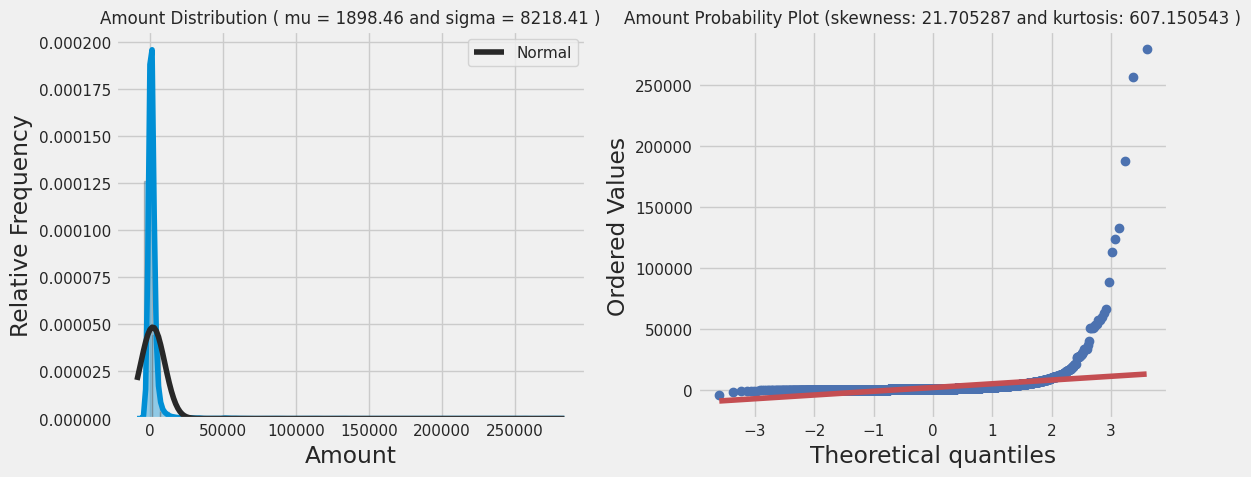

In [65]:
df['amount'] = df.Quantity*df.UnitPrice
customer_monetary_val = df[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.amount, 'Amount')

* The sales amount distribution is skewed, with a left-sided peak and a long right tail, indicating positive bias and deviation from normality.

* The probability plot reinforces right-skewedness, particularly on the right side.

* A high positive skewness of 21.7 highlights significant asymmetry towards lower sales amounts.

* Kurtosis of 607 signifies a heavily tailed distribution with a notable presence of outliers, potentially including more than 10 extreme values.

In summary, the sales amount distribution is strongly right-skewed, demonstrating substantial positive bias, a heavy-tailed pattern with potential outliers, and departure from a normal distribution.

Let's see a statistical summary of this dataset:

In [66]:
customer_history_df.describe()

recency    frequency         amount
count  4372.000000  4372.000000    4372.000000
mean     92.047118     5.075480    1898.459701
std     100.765435     9.338754    8219.345141
min       1.000000     1.000000   -4287.630000
25%      17.000000     1.000000     293.362500
50%      50.000000     3.000000     648.075000
75%     143.000000     5.000000    1611.725000
max     374.000000   248.000000  279489.020000

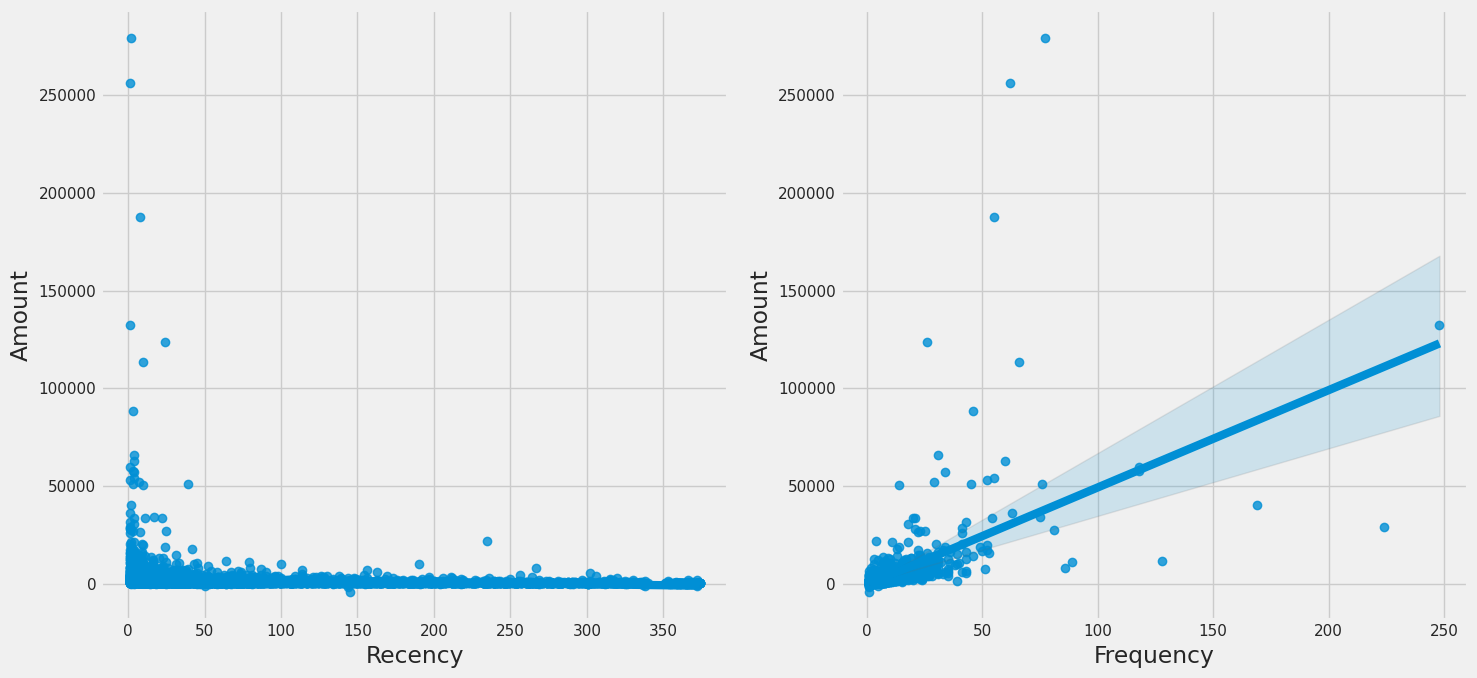

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.regplot(x='recency', y='amount', data=customer_history_df, ax=axes[0])
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Amount')

sns.regplot(x='frequency', y='amount', data=customer_history_df, ax=axes[1])
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Amount')


plt.tight_layout()
plt.show()

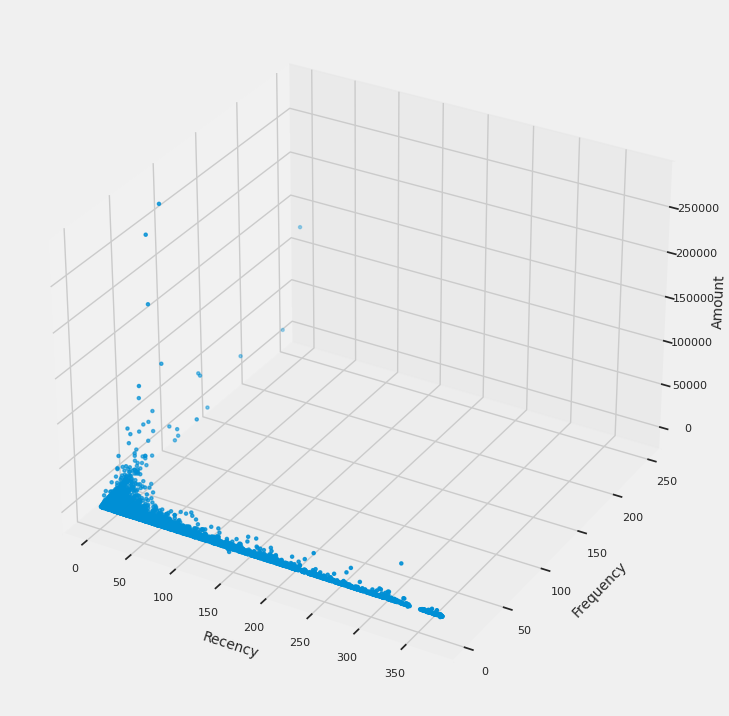

In [68]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')

xs = customer_history_df['recency']
ys = customer_history_df['frequency']
zs = customer_history_df['amount']
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency',fontdict={'size': 10})
ax.set_ylabel('Frequency',fontdict={'size': 10})
ax.set_zlabel('Amount', labelpad=2,fontdict={'size': 10})
ax.tick_params(axis='x', which='both', labelsize=8)
ax.tick_params(axis='y', which='both', labelsize=8)
ax.tick_params(axis='z', which='both', labelsize=8)


plt.show()

Evident trends can be observed in the provided plots, indicating that customers who make purchases more frequently and have made more recent purchases tend to exhibit higher spending. This is reflected in the ascending pattern of the Monetary values, coupled with a corresponding ascending trend for Frequency and a descending trend for Recency.

# <font face="Arial" size="5" color="royalblue"><b> CUSTOMER CATAGORIES</b></font>

---

### <font face="Arial" size="5" color="royalblue"><b>DATA PREPROCESSING </b></font>

---


In the previous section, following the clustering of various products into five distinct clusters, the initial step towards facilitating subsequent analysis involves incorporating this information directly into the DataFrame. This is achieved by introducing a categorical variable named "categ_product," which serves the purpose of denoting the specific cluster to which each individual product belongs.

In [88]:
np.random.seed(42)
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val
#__________________________________________________________________________
df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

<font face="Arial" size="4" color="royalblue"><b>I. CATAEGORIZING PRODUCTS</b></font>

---

In a subsequent phase, I proceed to generate the categ_N variables ( with  N $\in$ [0:4] ), each of which captures the total expenditure within specific product categories.

In [89]:
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

InvoiceNo                          Description  categ_product  categ_0  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER            3.0      0.0   
1    536365                  WHITE METAL LANTERN            3.0      0.0   
2    536365       CREAM CUPID HEARTS COAT HANGER            3.0      0.0   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE            2.0      0.0   
4    536365       RED WOOLLY HOTTIE WHITE HEART.            2.0      0.0   

   categ_1  categ_2  categ_3  categ_4  
0      0.0     0.00    15.30      0.0  
1      0.0     0.00    20.34      0.0  
2      0.0     0.00    22.00      0.0  
3      0.0    20.34     0.00      0.0  
4      0.0    20.34     0.00      0.0

Until this point, details pertaining to individual orders were distributed across multiple rows within the dataframe (one row per product). I opt to consolidate the information associated with a specific order and condense it into a single entry. To achieve this, I generate a fresh dataframe that encompasses, for each order, both the total purchase amount and its allocation across the five product categories.

In [90]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})

for i in range(5):
    col = 'categ_{}'.format(i)
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price = basket_price.merge(temp[['CustomerID', 'InvoiceNo', col]], on=['CustomerID', 'InvoiceNo'], how='left')

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis=1, inplace=True)

basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending=True)[:5]

CustomerID InvoiceNo  Basket Price  categ_0  categ_1  categ_2  categ_3  \
1      12347    537626        711.79    52.20    147.6   137.59   351.00   
2      12347    542237        475.39    80.40     76.6    34.00   188.30   
3      12347    549222        636.25    69.30    310.2    51.00   117.10   
4      12347    556201        382.52    84.36     35.4    51.00   170.86   
5      12347    562032        584.91    36.90     94.8    51.00   213.36   

   categ_4                   InvoiceDate  
1    23.40 2010-12-07 14:57:00.000000000  
2    96.09 2011-01-26 14:29:59.999999744  
3    88.65 2011-04-07 10:43:00.000000000  
4    40.90 2011-06-09 13:01:00.000000000  
5   188.85 2011-08-02 08:48:00.000000000

<font face="Arial" size="4" color="royalblue"><b>II. TEMPORAL DATA PARTITIONING </b></font>

---

The dataset "basket_price" encompasses data spanning 12 months. A subsequent goal involves constructing a model that can understand and predict the behaviors of visitors to the website right from their initial visit. To ensure a realistic evaluation of the model, the dataset has been divided. The first 10 months will be utilized for model development, while the subsequent two months will serve as a testing ground for the model's performance.






In [91]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [92]:
set_entrainement = basket_price[basket_price['InvoiceDate'] < pd.Timestamp(datetime(2011, 10, 1))]
set_test = basket_price[basket_price['InvoiceDate'] >= pd.Timestamp(datetime(2011, 10, 1))]
basket_price = set_entrainement.copy(deep = True)

<font face="Arial" size="4" color="royalblue"><b>III. CUSTOMER ORDER COMBINATIONS </b></font>

---

In the subsequent phase, I aggregate the various records associated with each individual user. This involves calculating the count of purchases made by each user, as well as determining the minimum, maximum, and average amounts per transaction. Additionally, I compute the cumulative sum of the total amount expended by the user across all their visits:

In [93]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

CustomerID  count     min     max        mean      sum    categ_0  \
0      12347      5  382.52  711.79  558.172000  2790.86  11.579226   
1      12348      4  227.44  892.80  449.310000  1797.24   3.872605   
2      12350      1  334.40  334.40  334.400000   334.40  41.357656   
3      12352      6  144.35  840.30  345.663333  2073.98   8.288412   
4      12353      1   89.00   89.00   89.000000    89.00   0.000000   

     categ_1    categ_2    categ_3    categ_4  
0  23.813448  11.630465  37.286714  15.690146  
1  41.296655   0.000000   0.000000  54.830740  
2  43.630383   0.000000   0.000000  15.011962  
3   6.267177  16.224843  10.988534  58.231034  
4  13.033708  22.359551  19.887640  44.719101

Finally, I define two additional variables that give the number of days elapsed since the first purchase ( **FirstPurchase** ) and the number of days since the last purchase ( **LastPurchase** ):



In [94]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

CustomerID  count     min     max        mean      sum    categ_0  \
0      12347      5  382.52  711.79  558.172000  2790.86  11.579226   
1      12348      4  227.44  892.80  449.310000  1797.24   3.872605   
2      12350      1  334.40  334.40  334.400000   334.40  41.357656   
3      12352      6  144.35  840.30  345.663333  2073.98   8.288412   
4      12353      1   89.00   89.00   89.000000    89.00   0.000000   

     categ_1    categ_2    categ_3    categ_4  LastPurchase  FirstPurchase  
0  23.813448  11.630465  37.286714  15.690146            59            297  
1  41.296655   0.000000   0.000000  54.830740             5            288  
2  43.630383   0.000000   0.000000  15.011962           240            240  
3   6.267177  16.224843  10.988534  58.231034             2            226  
4  13.033708  22.359551  19.887640  44.719101           134            134

A particularly intriguing customer segment is the one-time purchasers. These are customers who have made a single purchase throughout the observed period. One potential objective could be to focus on these customers with the intention of enhancing their retention. Upon analysis, it has been observed that this specific customer category constitutes approximately one-third of the total customer base. This information underscores the significance of devising strategies to engage and keep this segment of customers.

In [95]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("Number of customers with a single purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

Number of customers with a single purchase: 1448/3612  (40.09%)


### <font face="Arial" size="5" color="royalblue"><b>CREATION OF CUSTOMER CATAGORIES</b></font>

---


<font face="Arial" size="4" color="royalblue"><b>I. DATA ENCODING</b></font>

---

The dataframe transactions_per_user contains a summary of all the commands that were made. Each entry in this dataframe corresponds to a particular client. I use this information to characterize the different types of customers and only keep a subset of variables:

In [96]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
selected_customers = transactions_per_user.copy(deep=True)
matrix = selected_customers[list_cols].values

In practical terms, the selected variables exhibit significant variations across different ranges. Before proceeding with further analysis, a standardized matrix is generated to normalize these data. Standardization is crucial for consistent comparison and accurate modeling. It normalizes variable scales, enhancing algorithm performance, interpreting coefficients, handling outliers, and aiding data visualization. It ensures fair feature assessment and improves reliability across different analyses.






In [97]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  3.62735327 261.76263344 559.86711877 379.36367993  17.18487127
  23.02147611  20.30172147  19.77334085  19.72999858]


Subsequent to this, I will initiate the process of customer clustering. However, preceding the creation of these clusters, it proves beneficial to establish a lower-dimensional foundation capable of describing the scaled_matrix matrix. Subsequently, this foundation will be employed to craft a visual representation of the distinct clusters, thereby evaluating the efficacy of group separation. Thus, I undertake a preliminary Principal Component Analysis (PCA) to fulfill this purpose.

In [98]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

and I represent the amount of variance explained by each of the components:



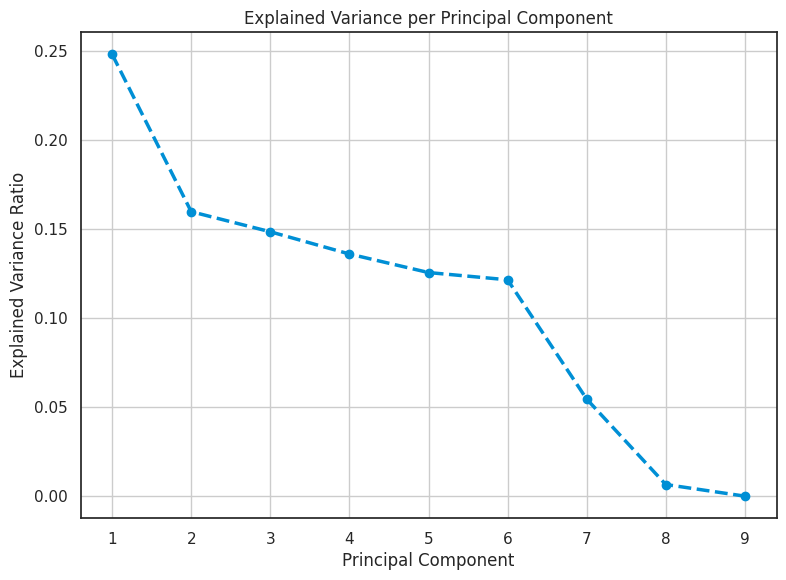

In [99]:
pca = PCA()
pca.fit(scaled_matrix)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

<font face="Arial" size="4" color="royalblue"><b>II. CRETING CUSTOMER CATAGORIES</b></font>

---

At this point, I define clusters of clients from the standardized matrix that was defined earlier and using the k-means algorithm from `scikit-learn`. I choose the number of clusters based on the silhouette score and I find that the best score is obtained with 11 clusters:

In [104]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100,random_state = 42)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('Silhouette score: {:<.3f}'.format(silhouette_avg))

Silhouette score: 0.220


nitially, I examine the quantity of customers within each cluster.

In [105]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['Number of clients']).T

3    10   6    5    0    4    2    1   8   7   9 
Number of clients  1528  425  383  367  308  215  195  162  12   9   8

This information shows the distribution of clients across different clusters. Cluster 3 has the highest number of clients, while Cluster 10 has the lowest. Each number represents the count of clients in the corresponding cluster.

> <font face="Arial"  color="darkred"><b> I. REPORT VIA PCA</b></font>

---

There is a certain disparity in the sizes of different groups that have been created. Hence I will now try to understand the content of these clusters in order to validate (or not) this particular separation. At first, I use the result of the PCA:

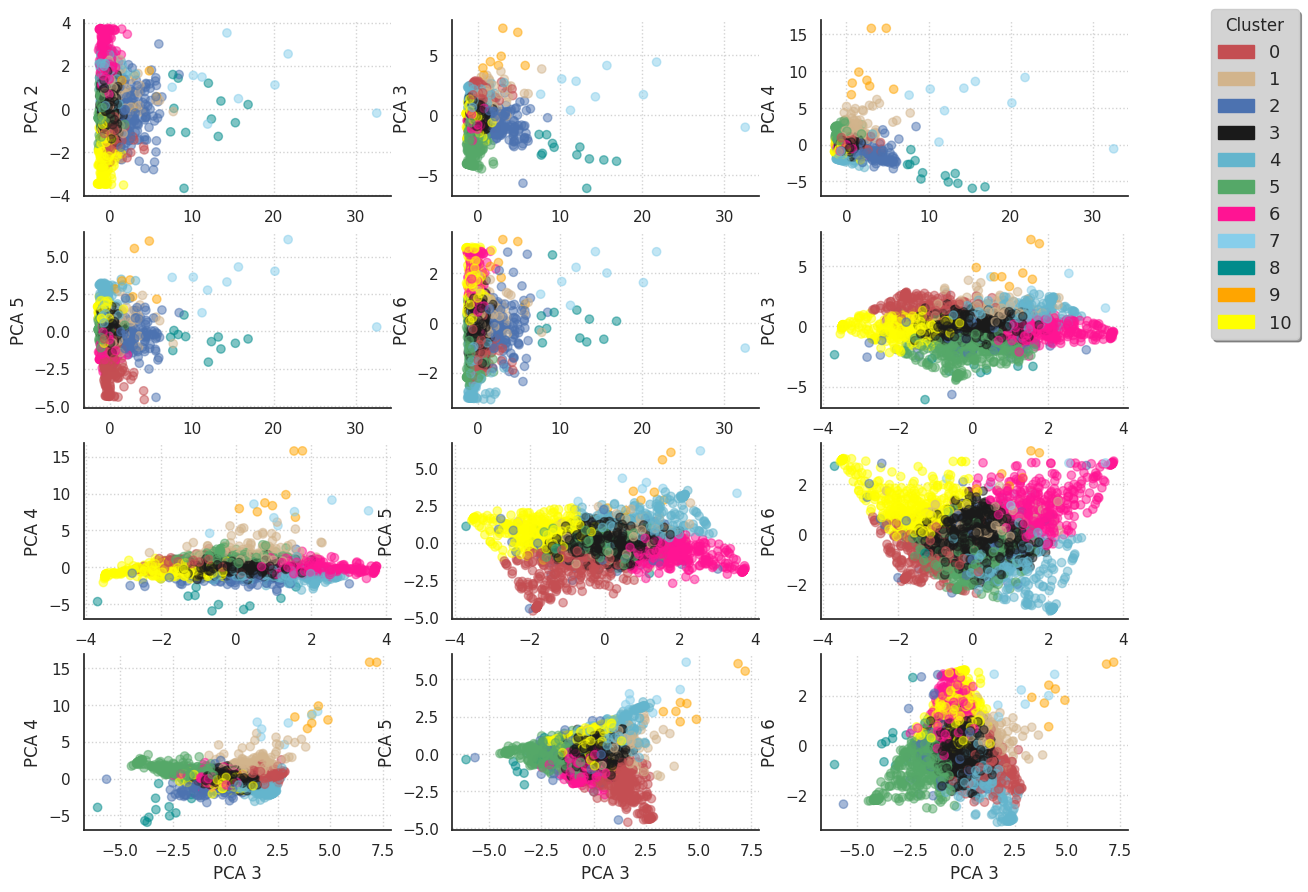

In [106]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5)
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        if increment == 12: break
    if increment == 12: break

comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9),
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()


The PCA plot illustrates the distribution of customers in a reduced-dimensional space based on the first six principal components. Each point represents a customer, colored according to the cluster they belong to. The plot helps visualize how well the clusters separate in the transformed space. Some clusters are tightly grouped, indicating distinct segments, while others overlap, suggesting potential similarities between those segments. The legend on the right identifies the cluster colors. It's evident that the first two principal components contribute significantly to the variance, as clusters are more visibly separated along those dimensions.






> <font face="Arial"  color="darkred"><b> II. INTRA-CLUSTER SILHOUETTE SCORE</b></font>

---

As with product categories, another way to look at the quality of the separation is to look at silouhette scores within different clusters:

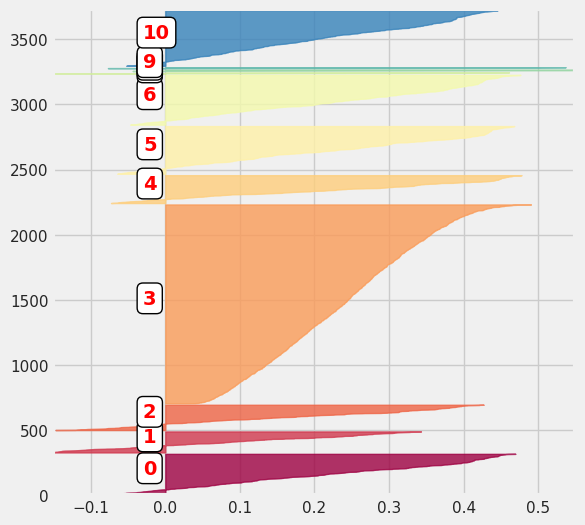

In [107]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

> <font face="Arial"  color="darkred"><b> III. CUSTOMER MORPHOTYPE</b></font>

---

At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the `selected_customers` dataframe a variable that defines the cluster to which each client belongs

In [108]:
selected_customers.loc[:, 'cluster'] = clusters_clients

Next, I aggregate the data within this dataframe by initially grouping clients into different segments. This provides insights into various metrics such as the average shopping basket price, visit frequency, and total expenditures made by clients within distinct clusters. Additionally, I ascertain the quantity of clients within each group, which is represented by the variable "size".

In [109]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())
merged_df = merged_df.sort_values('sum')

number of customers: 3612


Lastly, I rearrange the dataframe's contents by sorting the various clusters. This sorting is carried out in two steps: initially, based on the amount spent in each product category, and subsequently, according to the overall total amount spent by each cluster.

In [110]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])
#___________________________________
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

cluster      count          min           max         mean           sum  \
0       0.0   3.188312   216.632662    417.956688   312.387876   1080.760292   
1      10.0   2.435294   194.771835    301.251014   244.018351    599.499414   
2       6.0   2.483029   204.929817    327.615796   260.015268    671.278042   
3       4.0   2.158140   180.626656    332.071121   243.479218    636.749307   
4       5.0   2.305177   193.694033    317.699891   248.362547    619.271717   
5       3.0   3.077880   227.366741    459.052291   334.785615   1040.359883   
6       2.0   1.789744  1024.813641   1435.913749  1212.398549   2397.138467   
7       8.0   1.750000  3483.820833   3976.375000  3688.745056   6130.464167   
8       1.0  17.432099    87.945802   1456.562284   538.591036   9040.189506   
9       9.0  87.500000    21.917500   2657.693750   462.863301  38140.198750   
10      7.0  25.222222   454.858889  18403.718889  4896.186725  95127.310000   

      categ_0    categ_1    categ_2    categ_3    categ_4  size  
0   55.523335  15.618274   9.166360  10.790191   8.901840   308  
1    9.896908  56.428406   8.141166  10.963789  14.569732   425  
2    7.310749  11.166575  57.652840  13.223829  10.651558   383  
3    7.535651  10.929595  12.348020  61.398804   7.803747   215  
4    7.417036  11.871518  13.165443   9.762531  57.787166   367  
5   17.109790  22.823659  19.406559  22.231067  18.443267  1528  
6   18.108918  23.125056  19.156631  19.809158  19.800582   195  
7   11.552412  26.697491  23.600496  13.855310  24.294292    12  
8   21.236435  20.591367  21.304193  19.951656  16.947133   162  
9   20.646770  21.510396  19.786598  20.156286  17.900171     8  
10  22.560446  18.374624  21.940068  22.051208  15.890663     9

> <font face="Arial"  color="darkred"><b> III. CUSTOMER MORPHOLOGY</b></font>

---

Finally, I created a representation of the different morphotypes. To do this, I define a class to create "Radar Charts" (which has been adapted from this kernel):

In [111]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]

        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True,
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)

        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")

        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])

        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

This allows to have a global view of the content of each cluster:

# <font face="Arial" size="5" color="royalblue"><b>CLASSIFICATION OF CUSTOMERS</b></font>

---

In this part, the objective will be to adjust a classifier that will classify consumers in the different client categories that were established in the previous section. The objective is to make this classification possible at the first visit. To fulfill this objective, I will test several classifiers implemented in `scikit-learn`. First, in order to simplify their use, I define a class that allows to interface several of the functionalities common to these different classifiers:

In [175]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)

    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)

    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

Since the goal is to define the class to which a client belongs and this, as soon as its first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time:

In [176]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

We now split our dataset into training and testing sets. We perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [177]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

  **TERMINOLOGIES**

---



*    **PRECISION SCORE:** Precision is a measure of how many of the positive predictions made are correct (true positives).


### <font face="Arial" size="5" color="royalblue"><b> SUPPORT VECTOR MACHINE</b></font>

---

The first classifier I use is the SVC classifier. In order to use it, I create an instance of the Class_Fit class and then callgrid_search(). When calling this method, I provide as parameters:

* the hyperparameters for which I will seek an optimal value
* the number of folds to be used for cross-validation

In [253]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

Once this instance is created, I adjust the classifier to the training data:



In [254]:
svc.grid_fit(X = X_train, Y = Y_train)

then I can test the quality of the prediction with respect to the test data:

In [255]:
svc.grid_predict(X_test, Y_test)

Precision: 82.85 % 


> <font face="Arial"  color="darkred"><b> I. CONFUSION MATRIX</b></font>

---

In [256]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from which I create the following representation:

Confusion matrix, without normalization


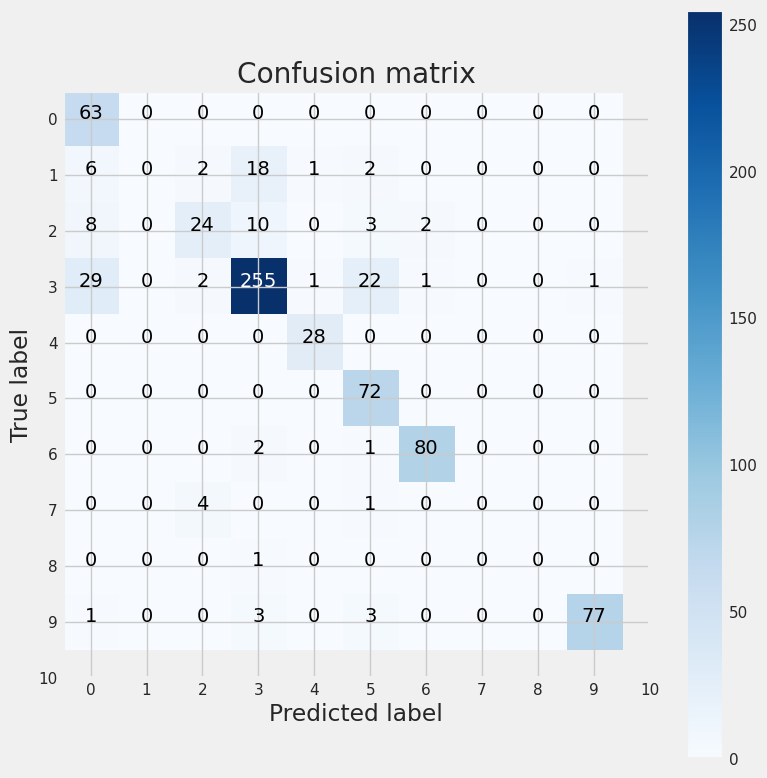

In [257]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions)
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

> <font face="Arial"  color="darkred"><b> II. LEARNING CURVE</b></font>

---

A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. In order to draw this curve, I use the scikit-learn documentation code again

In [258]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
from which I represent the leanring curve of the SVC classifier:

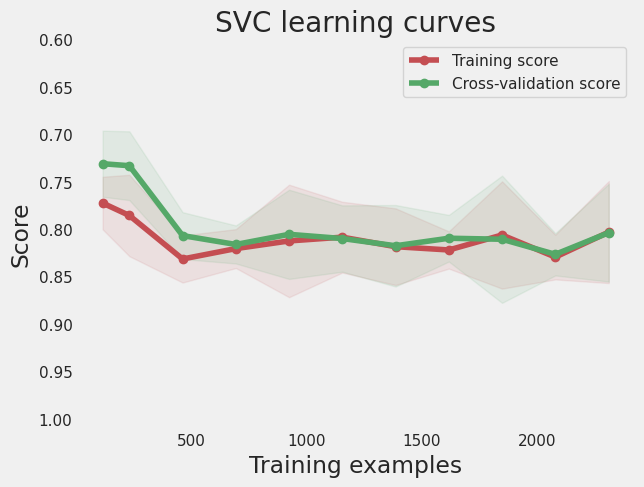

In [260]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim=[1.01, 0.6],
                        cv=5, train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                           0.6, 0.7, 0.8, 0.9, 1],
                        n_jobs=1)

### <font face="Arial" size="5" color="royalblue"><b> LOGISTIC REGRESSION </b></font>

---


I now consider the logistic regression classifier. As before, I create an instance of the Class_Fit class, adjust the model on the training data and see how the predictions compare to the real values:



In [250]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 90.87 % 


Then, I plot the learning curve to have a feeling of the quality of the model:



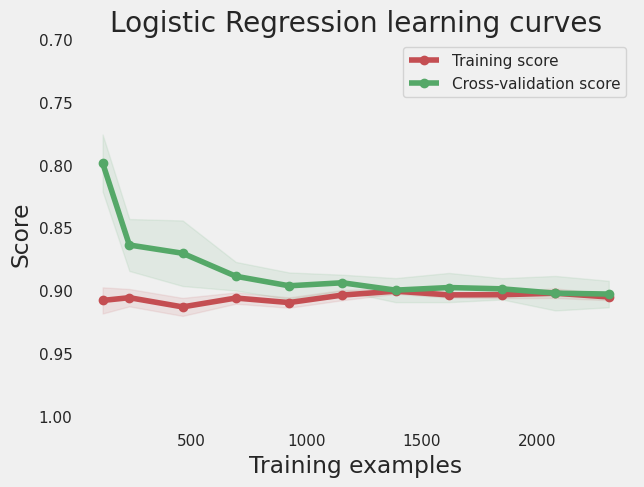

In [267]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim=[1.01, 0.7], cv=5, train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        n_jobs=1)

When the sample size increases, the training score and cross-validation score tend to converge. This convergence signifies that the performance of the model on the training data and the unseen validation data becomes more similar as the dataset size becomes larger. This behavior often suggests that the model's generalization ability improves with more data, and it's less likely to suffer from overfitting to the training set.






### <font face="Arial" size="5" color="royalblue"><b> K NEAREST NEIGHBOUR (KNN) </b></font>

---


Utilizing `Class_Fit`, a K-Nearest Neighbors (KNN) classifier was grid searched over a range of neighbors. The model was fitted and evaluated using training and test data. Parameters included `n_neighbors` in the range of 1 to 50.

In [ ]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Then, I plot the learning curve to have a feeling of the quality of the model:

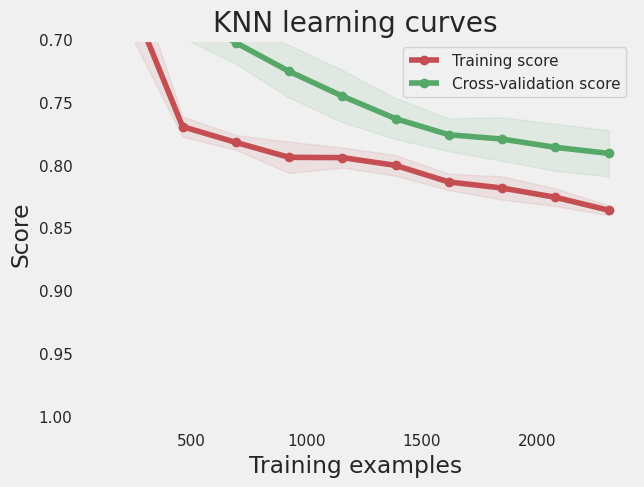

In [270]:
g = plot_learning_curve(knn.grid.best_estimator_, "KNN learning curves", X_train, Y_train,
                        ylim=[1.01, 0.7], cv=5, train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        n_jobs=1)

The training score and cross-validation score do not converge as the sample size increases. This divergence suggests potential overfitting, where the model may perform well on the training data but struggle to generalize effectively to unseen validation data.

### <font face="Arial" size="5" color="royalblue"><b> RANDOM FOREST</b></font>

---

rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

In [ ]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Then, I plot the learning curve to have a feeling of the quality of the model:

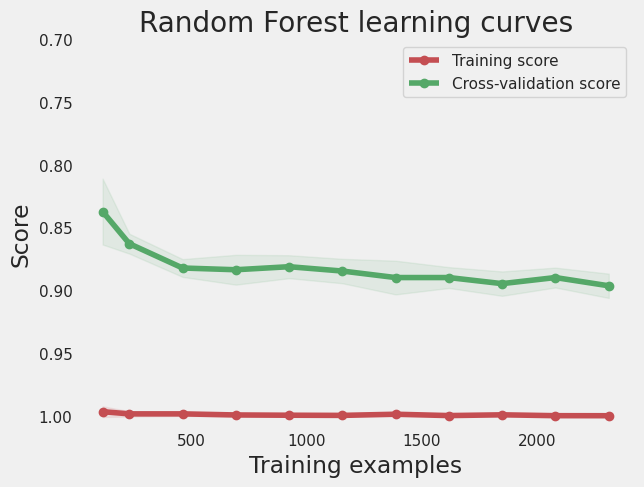

In [271]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim=[1.01, 0.7], cv=5, train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        n_jobs=1)

A constant training score of 1 and an increasing cross-validation score as the sample size grows in a Random Forest model could be indicative of the model's good generalization ability. It suggests that the model is consistently performing well on both the training data and unseen data, which is a positive sign of a well-fitted and well-generalized model.


### <font face="Arial" size="5" color="royalblue"><b> XGBOOST (EXTREME GRADIENT BOOST)</b></font>

---

In [ ]:
xgb_model = Class_Fit(clf=xgb.XGBClassifier)
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
xgb_model.grid_search(parameters=param_grid, Kfold=5)
xgb_model.grid_fit(X=X_train, Y=Y_train)
xgb_model.grid_predict(X_test, Y_test)

Then, I plot the learning curve to have a feeling of the quality of the model:

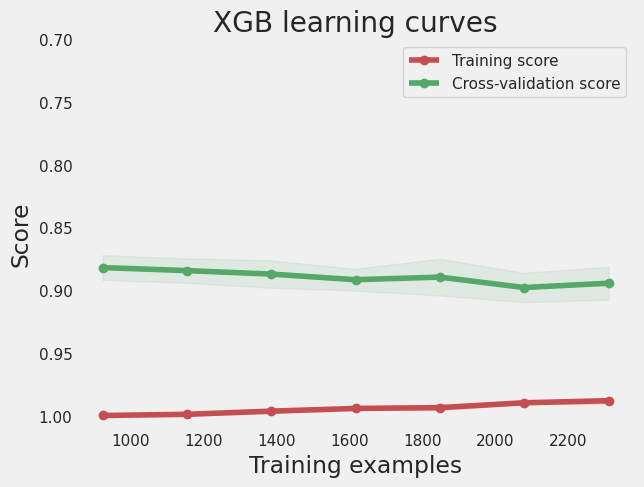

In [292]:
g = plot_learning_curve(xgb_model.grid.best_estimator_, "XGB learning curves", X_train, Y_train,
                        ylim=[1.01, 0.7], cv=5, train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        n_jobs=1)

As the sample size increases, the XGBoost training score gradually decreases from its initial perfect fit value of 1. This phenomenon indicates that the model's tendency to overfit diminishes as it encounters a larger and more diverse dataset. Simultaneously, the cross-validation score rises, signifying that the model generalizes better to unseen data points as its capacity to overfit decreases with the increase in sample size. These trends highlight the importance of balancing model complexity and data size to achieve optimal performance.

# <font face="Arial" size="5" color="royalblue"><b> MAXIMIZING PERFORMANCE: THE VOTING CLASSIFIER</b></font>

---

Ultimately, the outcomes derived from the preceding sections' various classifiers can be amalgamated to enhance the classification model. This amalgamation involves designating the customer category based on the consensus of the majority of classifiers. The method employed for this purpose is the VotingClassifier from the sklearn package. As a preliminary phase, I fine-tune the parameters of the diverse classifiers using the optimal parameters previously identified.

In [188]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
xgb_best = xgb.XGBClassifier(**xgb_model.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

Then, I define a classifier that merges the results of the various classifiers:

In [192]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('xgb', xgb_best),
                                                ('knn', knn_best),('lr', lr_best)], voting='soft')

and train it:

In [193]:
votingC = votingC.fit(X_train, Y_train)

In [194]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 91.84 % 


Note that when defining the `votingC` classifier, I only used the whole set of classifiers defined above and only retained the Random Forest, the k-Nearest Neighbors ,the Extreme Gradient Boosting and Logisic Regression classifiers.


# <font face="Arial" size="5" color="royalblue"><b>TESTING PREDICTIONS</b></font>

---

In the previous section, a few classifiers were trained in order to categorize customers. Until that point, the whole analysis was based on the data of the first 10 months. In this section, I test the model the last two months of the dataset, that has been stored in the `set_test` dataframe:

In [195]:
basket_price = set_test.copy(deep = True)

In a first step, I regroup reformattes these data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:

In [196]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

CustomerID  count      min      max     mean       sum    categ_0  \
0      12347     10   224.82  1294.32   759.57   7595.70  29.341601   
1      12349      5  1757.55  1757.55  1757.55   8787.75  10.739950   
2      12352      5   311.73   311.73   311.73   1558.65  17.861611   
3      12356      5    58.35    58.35    58.35    291.75   0.000000   
4      12357      5  6207.67  6207.67  6207.67  31038.35  12.436550   

     categ_1    categ_2    categ_3     categ_4  
0  10.873257   7.708309  37.042011   15.034822  
1  24.864157  23.623794  11.623567   29.148531  
2  20.562666  10.906875  11.949443   38.719405  
3   0.000000   0.000000   0.000000  100.000000  
4  16.151954  32.011205  22.785361   16.614930

Then, I convert the dataframe into a matrix and retain only variables that define the category to which consumers belong. At this level, I recall the method of normalization that had been used on the training set:

In [198]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
matrix_test = transactions_per_user[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)

In this phase, we exploit the matrix containing purchasing behavior of each consumer, where each row represents a customer's habits. This is a preliminary stage and not the actual classification. The aim is to ascertain the category for each customer. Notably, this process relies on data collected over two months, utilizing variables such as 'count', 'min', 'max', and 'sum'. It's important to distinguish this step from the subsequent classification, which utilizes a more focused set of variables derived from a client's initial purchase.

In a nutshell, we use two months' data to establish customer categories, serving as a reference for evaluating the classifier's predictions. To determine these categories, I revisit the k-means method introduced in Section 4. The 'predict' method of this k-means instance calculates distances between customers and centroids of the 11 client classes. The category is based on the smallest distance to these centroids.






In [199]:
Y = kmeans.predict(scaled_test_matrix)

Finally, in order to prepare the execution of the classifier, it is sufficient to select the variables on which it acts:

In [200]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

It remains only to examine the predictions of the different classifiers that have been trained in section 5:

In [209]:
classifiers = [
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (rf, 'Random Forest'),
                (xgb_model, 'Extreme Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Logostic Regression
Precision: 75.75 % 
______________________________ 
k-Nearest Neighbors
Precision: 66.35 % 
______________________________ 
Random Forest
Precision: 75.40 % 
______________________________ 
Extreme Gradient Boosting
Precision: 75.79 % 


At this level, I chose to mix Logistic Regression, Random Forest,Extreme Gradient Boosting and k-Nearest Neighbors predictions because this leads to a slight improvement in predictions:

In [210]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 76.34 % 


# <font face="Arial" size="5" color="royalblue"><b>CUSTOMER SEGMENTATION CONCLUSION </b></font>

---

he work described in the notebook focuses on developing a classifier for predicting the type of purchase a customer will make and the number of visits they will have on an E-commerce platform. The dataset used in this study contains purchase details over a year, involving approximately 4000 clients. The objective is to create a classifier that can anticipate customer behavior from their first visit to the E-commerce site.

The process can be summarized as follows:

**Product Classification:** The first step involved categorizing the different products sold on the platform into five main categories.

**Customer Classification: **Customers were classified into 11 major categories based on their consumption habits over a period of 10 months. The classification was done by considering factors like the type of products they usually buy, the number of visits they make, and the total amount they spend during the 10-month period.

**Classifier Training:** Several classifiers were trained using five variables:

"mean": The average amount of the basket for the current purchase.

"categ_N": The percentage spent in product category N, where N ranges from 0 to 4.

**Prediction and Evaluation:** The performance of the trained classifiers was tested on the last two months of the dataset. The data was processed in two steps: first, all the data from the two months was used to assign a category to each client, and then the predictions from the classifiers were compared with this category assignment. The accuracy of the classifier was found to be 75%, indicating reasonable performance considering potential limitations.

**Limitations and Potential Bias:** The study acknowledges some limitations. One significant bias that was not addressed is the seasonality of purchases. Purchasing habits might be influenced by factors like holidays (e.g., Christmas). This could lead to the categories defined over a 10-month period differing from those derived from the last two months. To mitigate this bias, having a longer timeframe of data collection would be beneficial.

In conclusion, the work focuses on using machine learning classifiers to predict customer behavior and categorize customers based on their purchase habits. While achieving 75% accuracy is considered decent, the study highlights the need to account for seasonal effects and suggests that a longer period of data collection could help improve the model's performance.

# <font face="Arial" size="10" color="GREEN"><b>$\star$ CROSS SELLING</b></font>

---

The cross selling is the ability to sell more products to a customer by analyzing the customer's shopping trends as well as general shopping trends and patterns which are in common with the customer's shopping patterns. More often than not, these recommended products would be very appealing. The retailer will often offer you a bundle of products with some attractive offer and it is highly likely that we will end up buying the bundled products instead of just the original item.

So, we research the customer transactions and find out potential additions to the customer's original needs and offer it to the customer as a suggestion in the hope and intent that they buy them benefiting both the customer as well as the retail establishment.

In this section, we explore association rule-mining, a powerful technique that can be used for cross selling, then we apply the concept of market basket analysis to our retail transactions dataset.

# <font face="Arial" size="5" color="royalblue"><b>MARKET BASKET ANALYSIS WITH ASSOCIATION RULE-MINING</b></font>

---

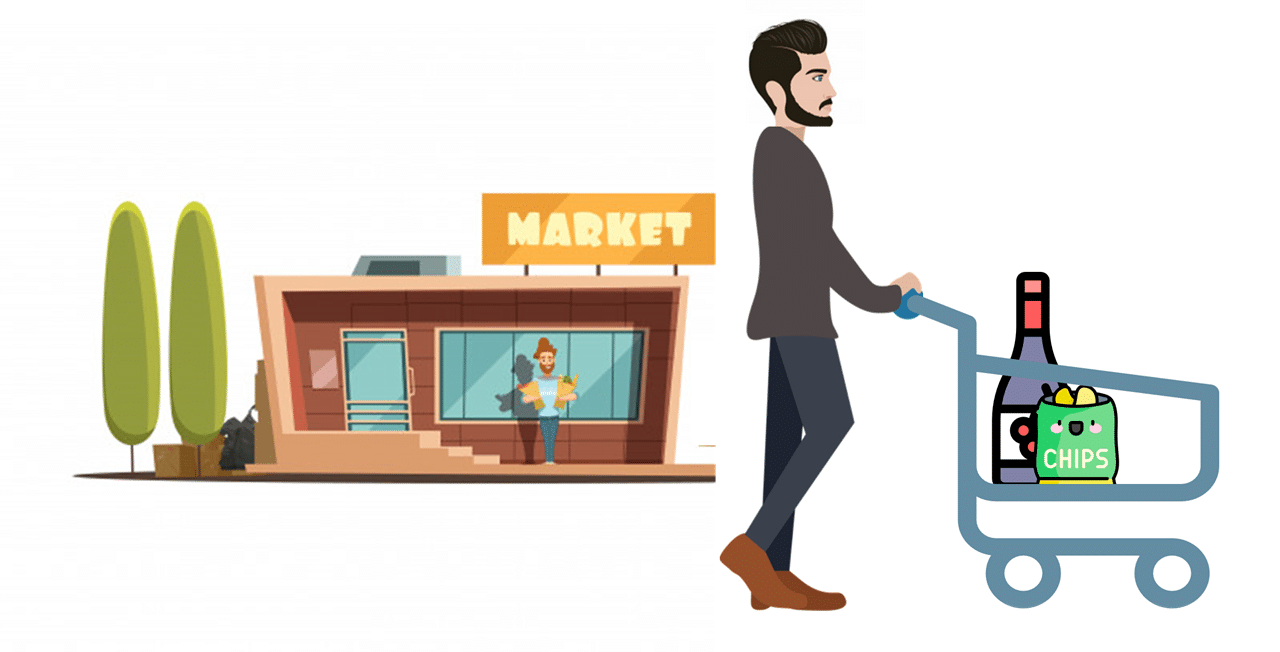

Market Basket Analysis is a data mining technique used to discover relationships between items frequently purchased together in transactions. It enables businesses to gain insights into customer buying behavior and optimize product placement, cross-selling, and promotional strategies. This analysis is achieved through Association Rule Mining, where three key metrics—Support, Lift, and Confidence—play crucial roles:

* **Support:** Support measures the frequency of occurrence of an itemset (a combination of items) in the dataset. It quantifies how often a particular combination of items appears together. Mathematically, it's defined as the ratio of transactions containing the itemset to the total number of transactions.

* **Lift:** Lift measures the strength of association between two items in an itemset, compared to the expected likelihood of them being purchased together by chance. A Lift value greater than 1 indicates a positive association, implying that the two items are purchased together more often than expected. A Lift value equal to 1 indicates independence.

> > If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.

> > If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.

> > If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.


* **Confidence:** Confidence measures the reliability of a rule. It quantifies how often an item B is purchased when item A is purchased. Mathematically, it's defined as the ratio of the support of the itemset containing both A and B to the support of the itemset containing only A.

* **Frequent itemset:** Frequent itemsets are itemsets whose support is greater than a user defined support threshold.

* **Conviction:** Is the ratio of the expected frequency that item X occurs without a item Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.

### <font face="Arial" size="5" color="royalblue"><b>ALGORITHMS </b></font>

---




Some well-known algorithms are Apriori, Eclat and FP-Growth, but they only do half the job, since they are algorithms for mining frequent itemsets. Another step needs to be done after to generate rules from frequent itemsets found in a database.

The major bottleneck in any association rule-mining algorithm is the generation of frequent itemsets. If the transaction dataset is having k unique products, then potentially we have 2k possible itemsets.

**Apriori**

Apriori uses a breadth-first search strategy to count the support of itemsets and uses a candidate generation function which exploits the downward closure property of support. So, the algorithm will first generate these itemsets and then proceed to finding the frequent itemsets. For around 100 unique products the possible number of itemsets is huge, and shows up that the Apriori algorithm prohibitively computationally expensive.

**Eclat algorithm**

Eclat is a depth-first search algorithm based on set intersection. It is suitable for both sequential as well as parallel execution with locality-enhancing properties.

**FP Growth**

FP stands for frequent pattern. The FP growth algorithm is superior to Apriori algorithm as it doesn't need to generate all the candidate itemsets. The FP growth algorithm uses a divide-and-conquer strategy and leverages a special data structure called the FP-tree, to find frequent itemsets without generating all itemsets. The core steps of the algorithm are as follows:

1. In the first pass, the algorithm take in the transactional database and counts occurrence of items (attribute-value pairs) in the dataset, and stores them to 'header table'.
2. In the second pass, it builds the FP-tree structure by inserting instances to represent frequent itemsets. Items in each instance have to be sorted by descending order of their frequency in the dataset, so that the tree can be processed quickly. Items in each instance that do not meet minimum coverage threshold are discarded. If many instances share most frequent items, FP-tree provides high compression close to tree root.
3. Divide this compressed representation into multiple conditional datasets such that each one is associated with a frequent pattern.
4. Mine for patterns in each such dataset so that shorter patterns can be recursively concatenated to longer patterns, hence making it more efficient.

Recursive processing of this compressed version of main dataset grows large item sets directly, instead of generating candidate items and testing them against the entire database. Growth starts from the bottom of the header table (having longest branches), by finding all instances matching given condition. New tree is created, with counts projected from the original tree corresponding to the set of instances that are conditional on the attribute, with each node getting sum of its children counts. Recursive growth ends when no individual items conditional on the attribute meet minimum support threshold, and processing continues on the remaining header items of the original FP-tree.

Once the recursive process has completed, all large item sets with minimum coverage have been found, and association rule creation begins.



### <font face="Arial" size="5" color="royalblue"><b>TRANSACTION DATASET </b></font>

---




In order to perform our data in these algorithms, we must first turn them into a sales event table where each product sold will be represented by a column, having its value 1 for when it was sold in that event or zero when not. This will generate a sparse table

In [211]:
items = list(df.Description.unique())
grouped = df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

### <font face="Arial" size="5" color="royalblue"><b>PRUNE DATASET FOR FREQUENT ITEMSETS </b></font>

---




We saw in the earlier on EDA how only a handful of items are responsible for bulk of our sales so we want to prune our dataset to reflect this information. For this we have created a function prune_dataset below, which will help us reduce the size of our dataset based on our requirements. The function can be used for performing three types of pruning:

* Pruning based on percentage of total sales: The parameter total_sales_perc will help us select the number of items that will explain the required percentage of sales. The default value is 50% or 0.5.
* Pruning based on ranks of items: Another way to perform the pruning is to specify the starting and the ending rank of the items for which we want to prune our dataset.
* Pruning based on list of features passed to the parameter TopCols.

By default, we will only look for transactions which have at least two items, as transactions with only one item are counter to the whole concept of association rule-mining.

In [212]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5,
                  start_item = None, end_item = None, TopCols = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',
                               item_count.columns[1]:'item_count'}, inplace=True)
    if TopCols:
        input_df['total_items'] = input_df[TopCols].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[TopCols], item_count[item_count.item_name.isin(TopCols)]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]
    else:
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]

We use the second option of pruning, by the Top 15th products in sales events.

In [216]:
AmoutSum = df.groupby(["Description"]).amount.sum().sort_values(ascending=False)

# Calculate the count of invoices for each product and sort in descending order
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending=False)

# Get the top 15 products based on invoice count
Top15ev = list(inv[:15].index)

# Prune the dataset to keep only the top 15 products
output_df, item_counts = prune_dataset(input_df=transaction_df, length_trans=2, start_item=0, end_item=15)

# Calculate and print the total sales amount and other statistics
total_sales_amount = AmoutSum[Top15ev].sum()
num_sales_events = output_df.shape[0]
num_products = output_df.shape[1]

# Drop rows with NaN values from item_counts
item_counts = item_counts.dropna()

print('Total Sales Amount by the Top 15 Products in Sales Events (Invoice): {:.2f}'.format(total_sales_amount))
print('Number of Sales Events:', num_sales_events)
print('Number of Products:', num_products)
print('Item Counts (after dropping NaN):\n', item_counts)

Total Sales Amount by the Top 15 Products in Sales Events (Invoice): 863668.27
Number of Sales Events: 5263
Number of Products: 15
Item Counts (after dropping NaN):
                              item_name  item_count
0   WHITE HANGING HEART T-LIGHT HOLDER        2302
1             REGENCY CAKESTAND 3 TIER        2169
2              JUMBO BAG RED RETROSPOT        2135
3                        PARTY BUNTING        1706
4              LUNCH BAG RED RETROSPOT        1607
5        ASSORTED COLOUR BIRD ORNAMENT        1467
6    SET OF 3 CAKE TINS PANTRY DESIGN         1458
8      PACK OF 72 RETROSPOT CAKE CASES        1334
9              LUNCH BAG  BLACK SKULL.        1295
10     NATURAL SLATE HEART CHALKBOARD         1266
11                             POSTAGE        1250
12             JUMBO BAG PINK POLKADOT        1231
13            JAM MAKING SET WITH JARS        1220
14               HEART OF WICKER SMALL        1212


### <font face="Arial" size="5" color="royalblue"><b>ASSOCIATION RULE MINING </b></font>

---

Association rule mining is a data mining technique that discovers relationships between items in a dataset. It identifies frequent itemsets and generates rules that capture associations between items. These rules express patterns such as "if X, then Y," revealing insights for decision-making in areas like market basket analysis and recommendation systems.

In [290]:
binary_df = output_df.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(binary_df, min_support=0.01, use_colnames=True)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
association_rules_df_display = association_rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
association_rules_df_display['antecedents'] = association_rules_df_display['antecedents'].apply(list)
association_rules_df_display['consequents'] = association_rules_df_display['consequents'].apply(list)
association_rules_df_display.head(15)

antecedents  \
0                           [JUMBO BAG PINK POLKADOT]   
1                           [LUNCH BAG  BLACK SKULL.]   
2   [NATURAL SLATE HEART CHALKBOARD , JUMBO BAG RE...   
3   [JUMBO BAG PINK POLKADOT, WHITE HANGING HEART ...   
4   [LUNCH BAG  BLACK SKULL., WHITE HANGING HEART ...   
5   [NATURAL SLATE HEART CHALKBOARD , SET OF 3 CAK...   
6   [NATURAL SLATE HEART CHALKBOARD , PACK OF 72 R...   
7   [HEART OF WICKER SMALL, PACK OF 72 RETROSPOT C...   
8   [NATURAL SLATE HEART CHALKBOARD , JAM MAKING S...   
9   [NATURAL SLATE HEART CHALKBOARD , HEART OF WIC...   
10  [JUMBO BAG PINK POLKADOT, JAM MAKING SET WITH ...   
11  [HEART OF WICKER SMALL, JAM MAKING SET WITH JARS]   
12  [REGENCY CAKESTAND 3 TIER, JUMBO BAG PINK POLK...   
13   [PACK OF 72 RETROSPOT CAKE CASES, PARTY BUNTING]   
14  [REGENCY CAKESTAND 3 TIER, LUNCH BAG RED RETRO...   

                             consequents   support  confidence      lift  
0              [JUMBO BAG RED RETROSPOT]  0.158275    0.768450  2.343194  
1              [LUNCH BAG RED RETROSPOT]  0.123124    0.610745  2.329238  
2   [WHITE HANGING HEART T-LIGHT HOLDER]  0.030781    0.507837  1.705645  
3              [JUMBO BAG RED RETROSPOT]  0.034771    0.709302  2.162838  
4              [LUNCH BAG RED RETROSPOT]  0.027361    0.543396  2.072387  
5   [WHITE HANGING HEART T-LIGHT HOLDER]  0.023371    0.516807  1.735771  
6   [WHITE HANGING HEART T-LIGHT HOLDER]  0.021851    0.534884  1.796486  
7   [WHITE HANGING HEART T-LIGHT HOLDER]  0.015960    0.515337  1.730837  
8   [WHITE HANGING HEART T-LIGHT HOLDER]  0.023751    0.514403  1.727699  
9   [WHITE HANGING HEART T-LIGHT HOLDER]  0.029451    0.521886  1.752829  
10  [WHITE HANGING HEART T-LIGHT HOLDER]  0.013870    0.525180  1.763894  
11  [WHITE HANGING HEART T-LIGHT HOLDER]  0.018051    0.549133  1.844344  
12             [JUMBO BAG RED RETROSPOT]  0.018051    0.698529  2.129989  
13            [REGENCY CAKESTAND 3 TIER]  0.029261    0.503268  1.931947  
14     [PACK OF 72 RETROSPOT CAKE CASES]  0.027361    0.519856  2.590909

By setting min_support=0.01, I have ensured that only itemsets with a support of at least 0.01 (1%) are considered frequent. This helps capture significant item combinations.

Moreover, I've chosen min_threshold=0.5 for association_rules. This choice ensures that only rules with a confidence of 0.5 (50%) or higher are considered strong. Such rules provide reliable insights for decision-making.

Typically, a lift value of 1 indicates that the probability of occurrence of the antecedent and consequent together are independent of each other. Hence, the idea is to look for rules having a lift much greater than 1. So, let's see how much rules has lift greater than 1, equal 1 and less than one:

In [291]:
lift_greater_than_1_count = (association_rules_df_display['lift'] > 1).sum()
print("Number of Association Rules with Lift > 1:", lift_greater_than_1_count)

Number of Association Rules with Lift > 1: 273


# <font face="Arial" size="5" color="royalblue"><b>MARKET BASKET ANALYSIS CONCLUSION</b></font>

---

Upon performing the rule generation, it's evident that the process is straightforward yet resource-intensive, especially as item sets expand exponentially. Striking the right balance between support and confidence becomes pivotal to yield a substantial number of robust rules.

Alternatively, to unveil rare, high-confidence patterns, adopting a strategy of low support and elevated confidence proves fruitful, resulting in a profusion of rules. Identifying these low-support, high-confidence rules emerges as a focal point, holding immense potential for strategic cross-selling augmentation.